# Lab 2: More ggplot and dplyr

### We encourage you to be active on Piazza, asking and answering homework questions.

# Outline

* [Excercises from the last week](#Exercise)
* [Subset generation](#Subset-generation)
* [Geometric Plots](#Geometric-Plots)
* [Position adjustments](#Position-adjustments)
* [dplyr for data manipulation](#dplyr-for-data-manipulation)

## Exercise
1. What is the default value of the mean and standard deviation used by the "rnorm" function in R to generate a value from a normal distribution?
2. Create a boxplot of 'wage' grouped by the levels in the 'education' variable.

#### 1.
* The default value of the mean is 0
* The default standard deviation is 1 

(i.e. standard normal distribution)
##### Reference:
* https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Normal
* https://www.rdocumentation.org/packages/compositions/versions/1.40-3/topics/rnorm

#### 2.

In [1]:
# install the "ISLR2" package for the Wage dataset
# install.packages("ISLR2") 
library(ISLR2)

In [2]:
# install the "tidyverse package" to create ggplot 
# install.packages("tidyverse")
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
options(repr.plot.width=12,repr.plot.height=8)

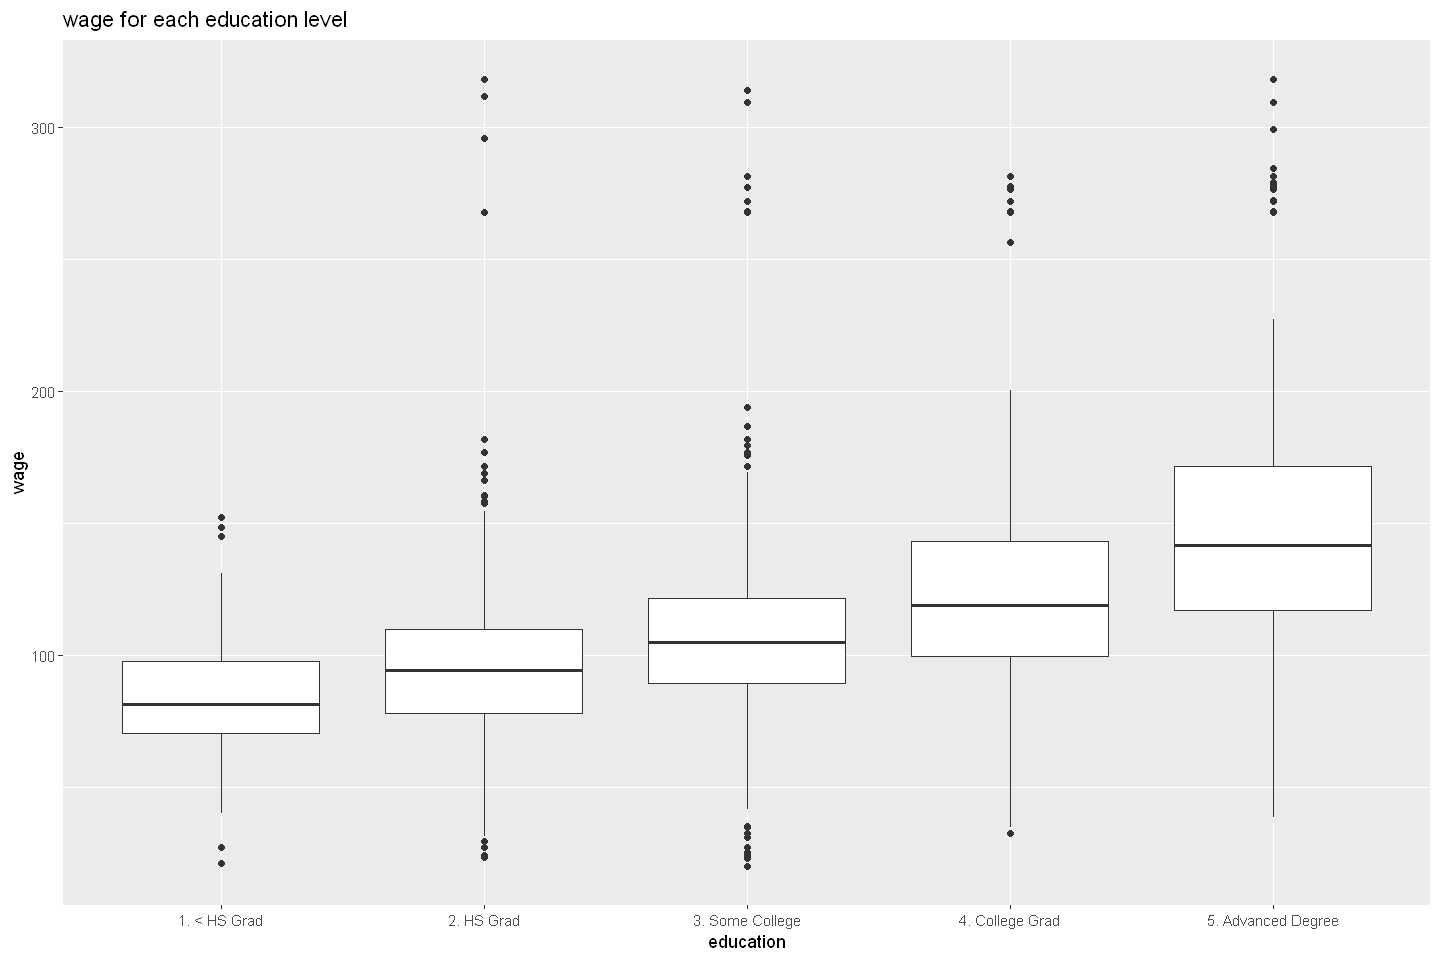

In [4]:
# boxplot helps to visualize the variability of wage for each education level
ggplot(data = Wage) + 
    geom_boxplot(mapping = aes(x = education, y = wage)) +
    labs(x = "education", y = "wage") + 
    ggtitle("wage for each education level")

### Facets
If we want more segmented plots

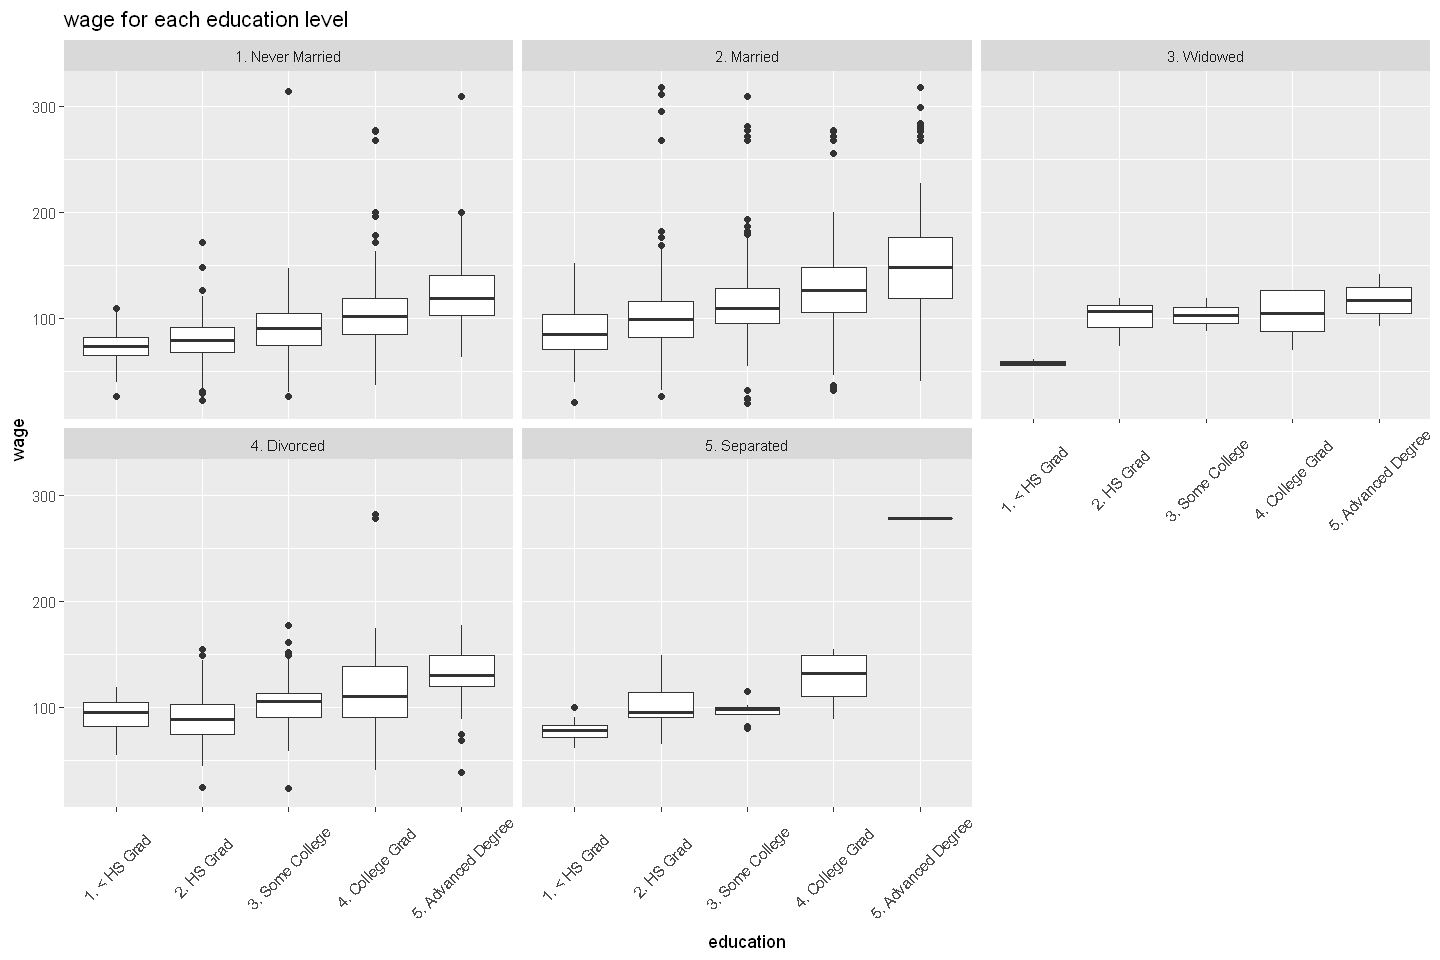

In [5]:
ggplot(data = Wage) + 
    geom_boxplot(mapping = aes(x = education, y = wage)) +
    labs(x = "education", y = "wage") + 
    ggtitle("wage for each education level") +
    facet_wrap(~maritl, nrow = 2) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))

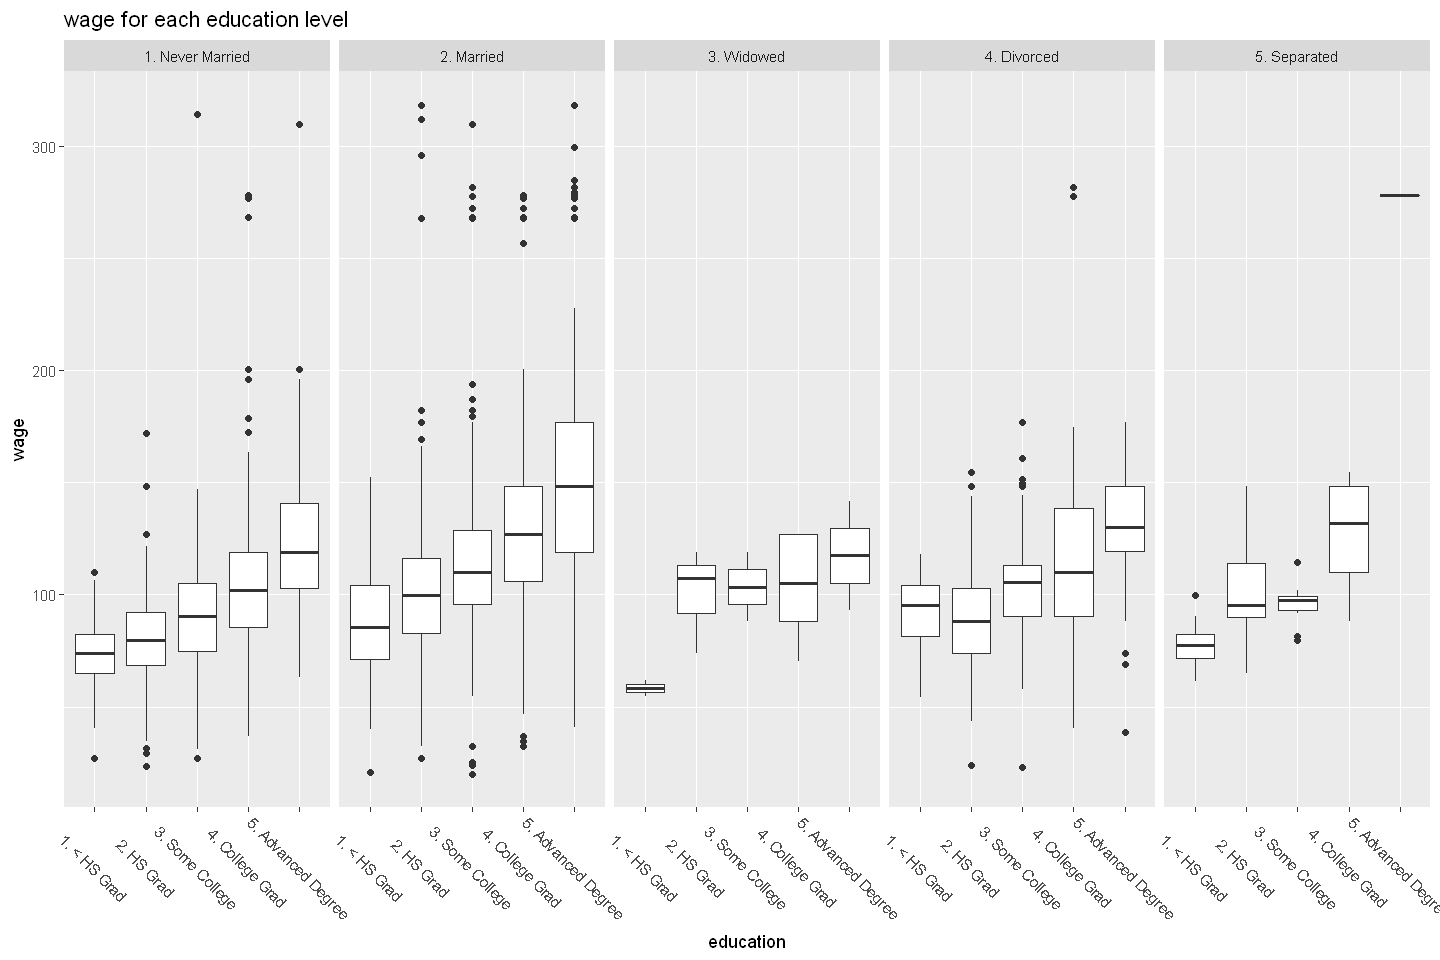

In [6]:
ggplot(data = Wage) + 
    geom_boxplot(mapping = aes(x = education, y = wage)) +
    labs(x = "education", y = "wage") + 
    ggtitle("wage for each education level") + facet_grid(.~maritl) +
    theme(axis.text.x = element_text(angle = -45, vjust = 0.5, hjust=0.5))

#### Understand vjust and hjust
Reference: https://stackoverflow.com/questions/7263849/what-do-hjust-and-vjust-do-when-making-a-plot-using-ggplot

The values of hjust and vjust are only defined between 0 and 1:

* 0 means left-justified
* 1 means right-justified

Source: ggplot2, Hadley Wickham, page 196

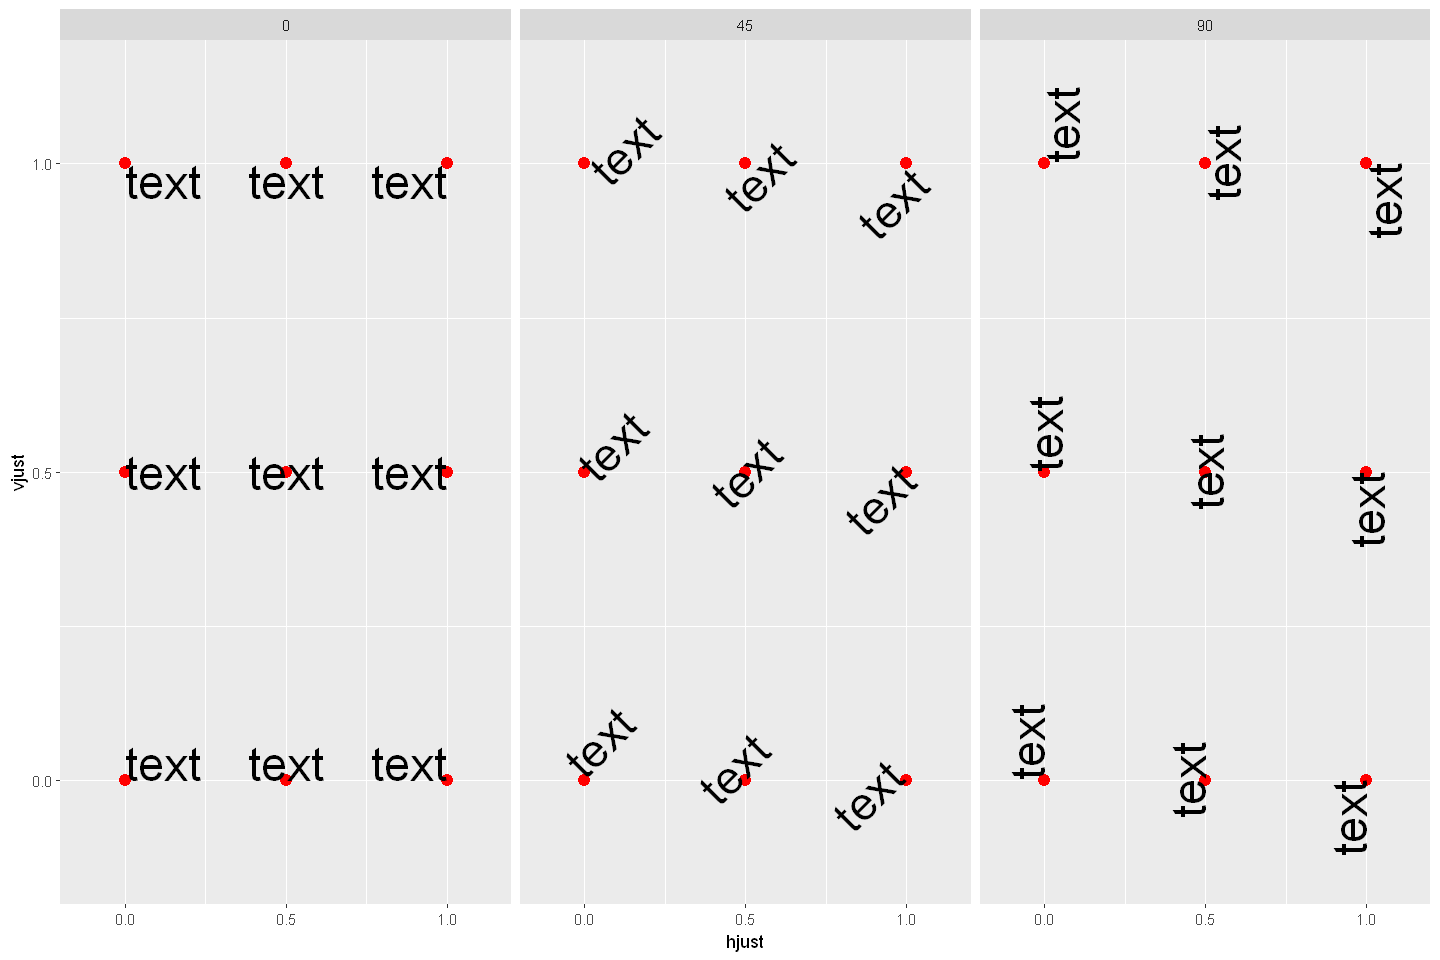

In [7]:
td = expand.grid(
    hjust=c(0, 0.5, 1),
    vjust=c(0, 0.5, 1),
    angle=c(0, 45, 90),
    text="text"
)

ggplot(td, aes(x=hjust, y=vjust)) + 
    geom_point(color = "red", size = 3) +
    geom_text(aes(label=text, angle=angle, hjust=hjust, vjust=vjust), size = 10) + 
    facet_grid(.~angle) +
    scale_x_continuous(breaks=c(0, 0.5, 1), expand=c(0, 0.2)) +
    scale_y_continuous(breaks=c(0, 0.5, 1), expand=c(0, 0.2))

## Subset generation

#### (1) Sample 1000 random rows

In [8]:
str(diamonds)

tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [9]:
set.seed(120)
rand_idx1 = floor(runif(1000, min=1, max=dim(diamonds)[1]))
dm1 = diamonds[rand_idx1, ]
print(names(dm1))
print(dim(dm1))

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      
[1] 1000   10


In [10]:
summary(dm1)

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 34   D:126   SI1    :262   Min.   :55.20  
 1st Qu.:0.4000   Good     : 95   E:171   VS2    :237   1st Qu.:61.00  
 Median :0.7100   Very Good:206   F:181   SI2    :158   Median :61.90  
 Mean   :0.7947   Premium  :279   G:214   VS1    :150   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :386   H:157   VVS2   : 98   3rd Qu.:62.50  
 Max.   :3.6500                   I:102   VVS1   : 61   Max.   :67.80  
                                  J: 49   (Other): 34                  
     table           price             x               y        
 Min.   :52.00   Min.   :  379   Min.   :3.910   Min.   :3.930  
 1st Qu.:56.00   1st Qu.:  943   1st Qu.:4.737   1st Qu.:4.760  
 Median :57.00   Median : 2405   Median :5.700   Median :5.715  
 Mean   :57.57   Mean   : 3913   Mean   :5.735   Mean   :5.736  
 3rd Qu.:59.00   3rd Qu.: 5444   3rd Qu.:6.520   3rd Qu.:6.500  
 Max.   :70.00   Max.   :18447   M

#### (2) Sample 70% random rows

In [11]:
set.seed(120)
rand_idx2 = floor(runif(floor(dim(diamonds)[1] * 0.7), min=1, max=dim(diamonds)[1]))
dm2 = diamonds[rand_idx2, ]
print(names(dm2))
print(dim(dm2))

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      
[1] 37758    10


In [12]:
summary(dm2)

     carat               cut        color       clarity         depth      
 Min.   :0.2000   Fair     : 1125   D:4699   SI1    :9321   Min.   :43.00  
 1st Qu.:0.4000   Good     : 3484   E:6843   VS2    :8504   1st Qu.:61.10  
 Median :0.7000   Very Good: 8398   F:6660   SI2    :6336   Median :61.80  
 Mean   :0.7979   Premium  : 9554   G:7984   VS1    :5819   Mean   :61.76  
 3rd Qu.:1.0400   Ideal    :15197   H:5792   VVS2   :3423   3rd Qu.:62.50  
 Max.   :5.0100                     I:3829   VVS1   :2570   Max.   :78.20  
                                    J:1951   (Other):1785                  
     table           price             x                y         
 Min.   :43.00   Min.   :  327   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2420   Median : 5.700   Median : 5.710  
 Mean   :57.43   Mean   : 3931   Mean   : 5.731   Mean   : 5.738  
 3rd Qu.:59.00   3rd Qu.: 5331   3rd Qu.: 6.540   3rd Qu.

## More about Facets

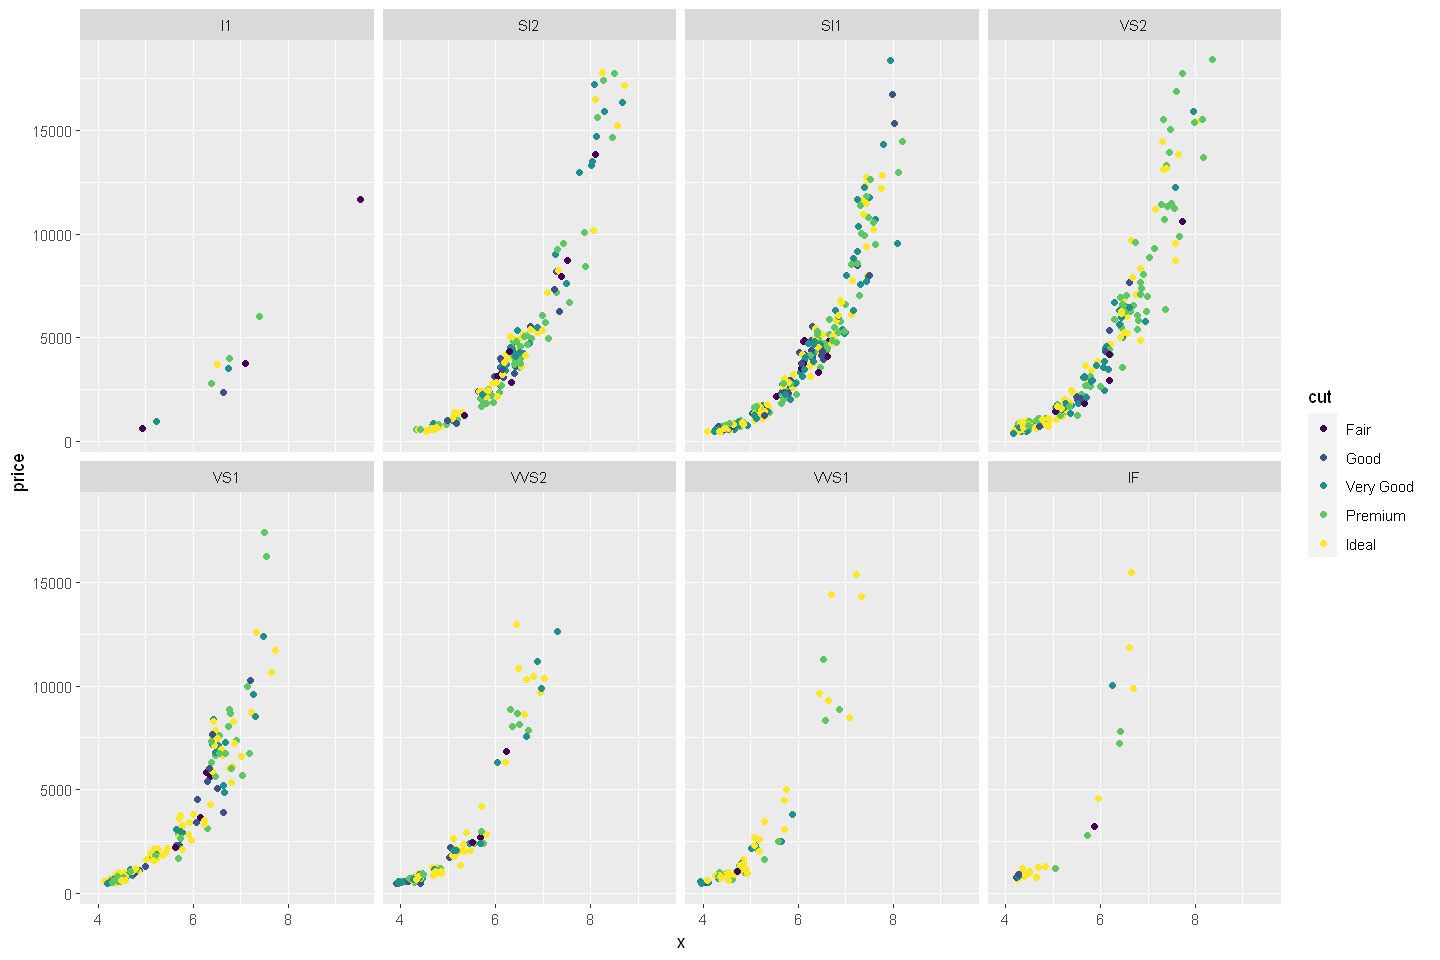

In [13]:
p1 = ggplot(data = dm1) + 
    geom_point(mapping = aes(x = x, y = price, color = cut)) + 
    facet_wrap(~clarity, nrow = 2)
print(p1)

## geom_smooth
We might be interested in the linear trends of the data that we have.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



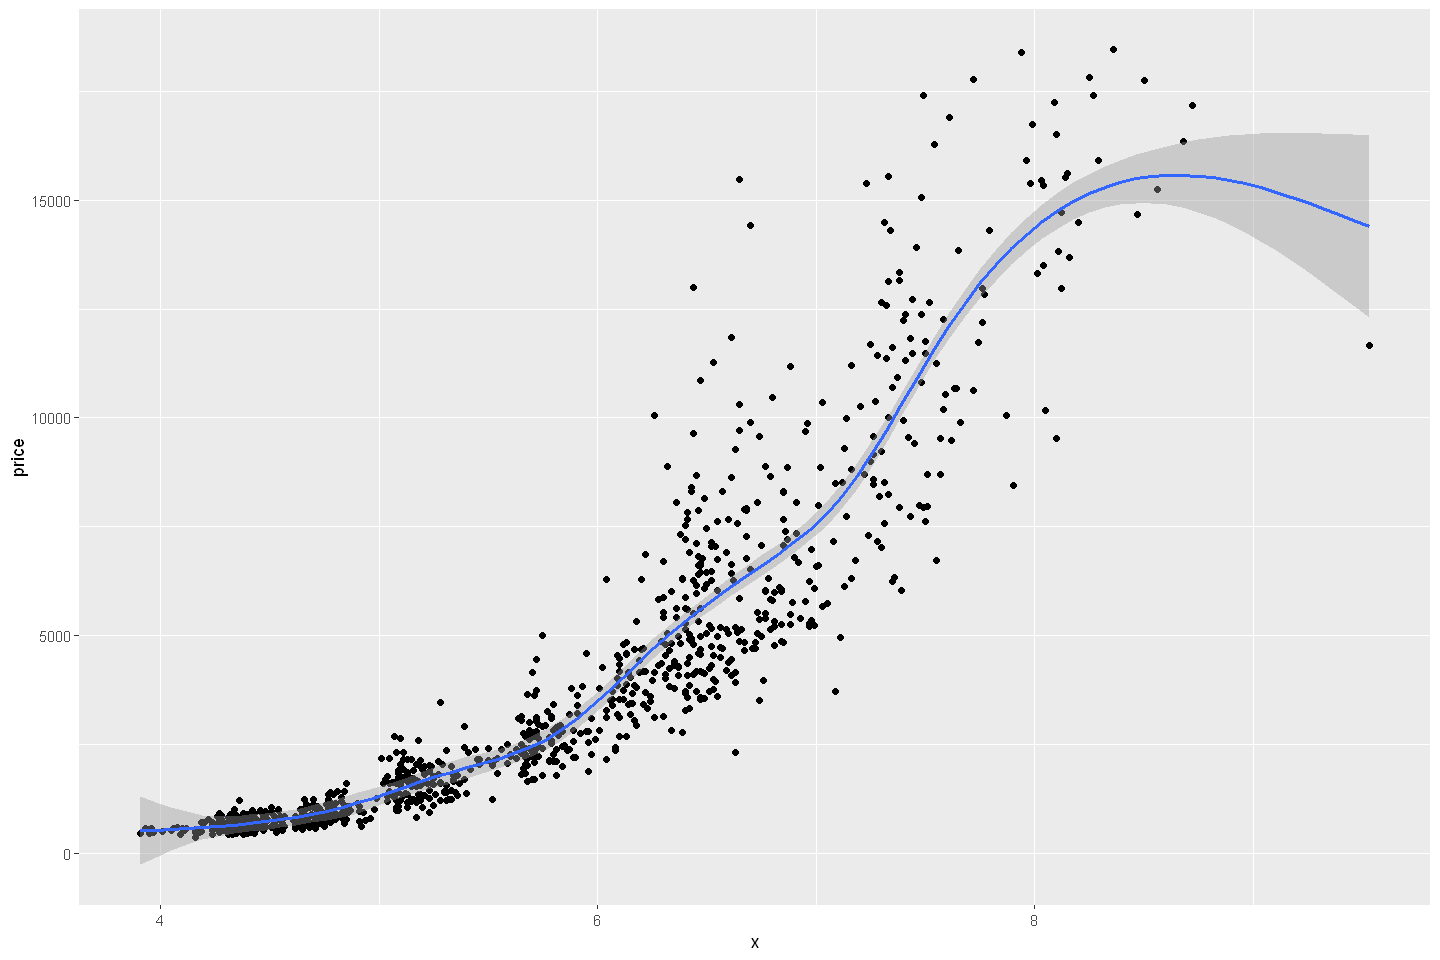

In [14]:
p2 = ggplot(data = dm1) + 
    geom_point(mapping = aes(x = x, y = price)) +
    geom_smooth(mapping = aes(x = x, y = price))
print(p2)

How to reduce the code duplication above? "(x=x, y=price)" is in both lines. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



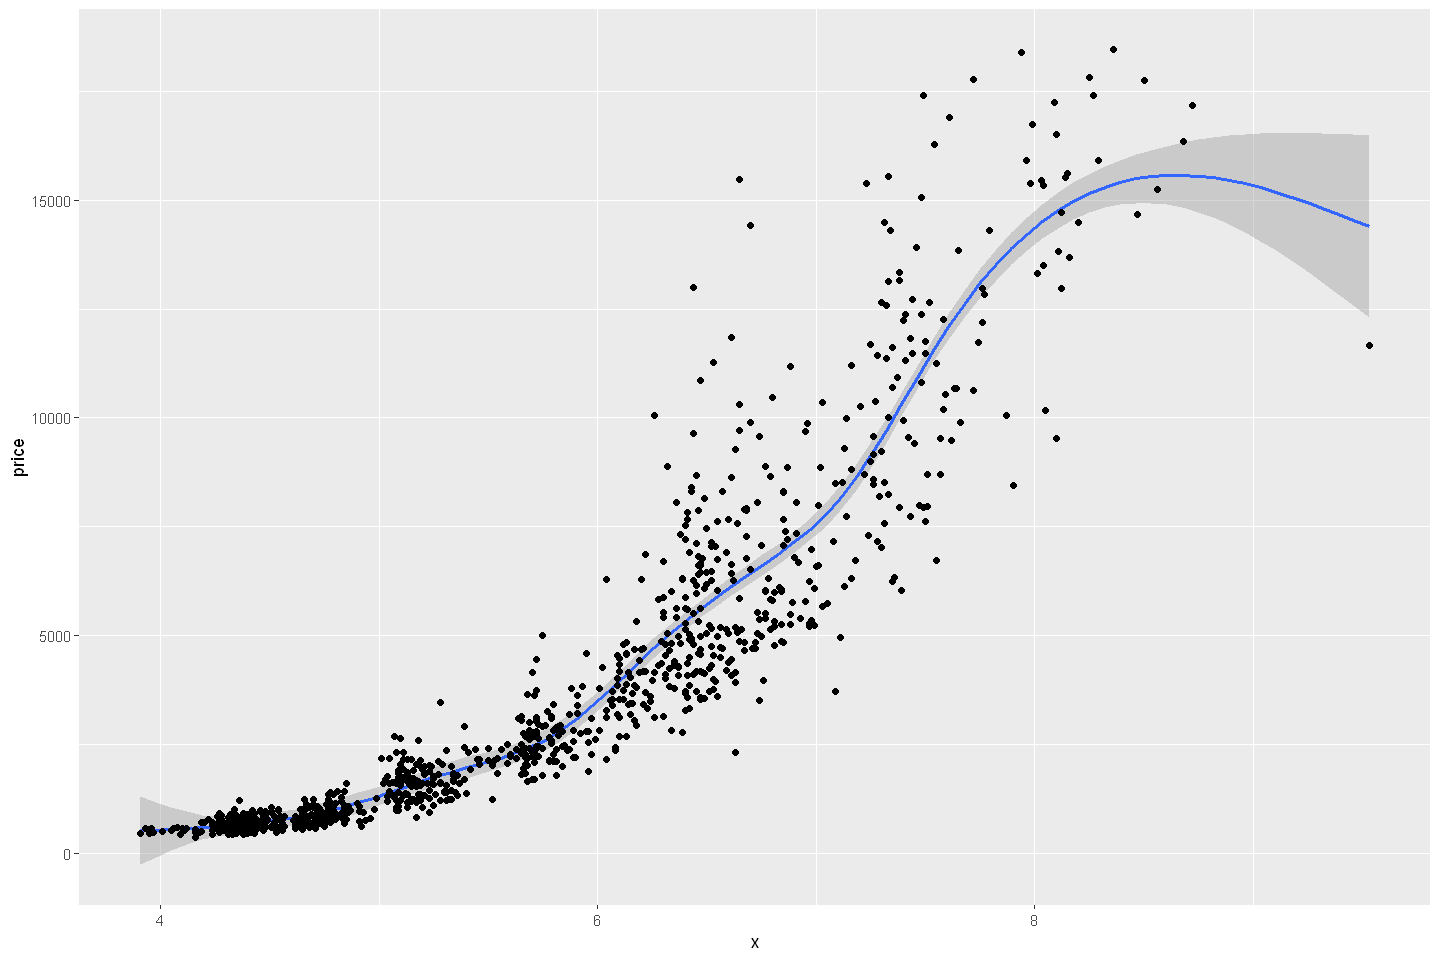

In [15]:
ggplot(data = dm1, mapping = aes(x = x, y= price)) + 
  geom_smooth() +  geom_point()

## Geometric Plots
 Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, ?geom_bar shows that the default value for stat is 'count', which means that geom_bar() uses stat_count().

stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.https://ggplot2.tidyverse.org/reference/geom_bar.html

Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).


In [16]:
popn = tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

**Note**: **tibble** is very similar to **data.frame** and we will learn more about it later in the course. 

In [17]:
popn

country,population
<chr>,<dbl>
ETHIOPIA,1.02e+08
NIGERIA,1.86e+08
EGYPT,9.60e+07
DR CONGO,7.80e+07
SOUTH AFRICA,5.60e+07


$title
[1] "Most populous countries in Africa"

attr(,"class")
[1] "labels"

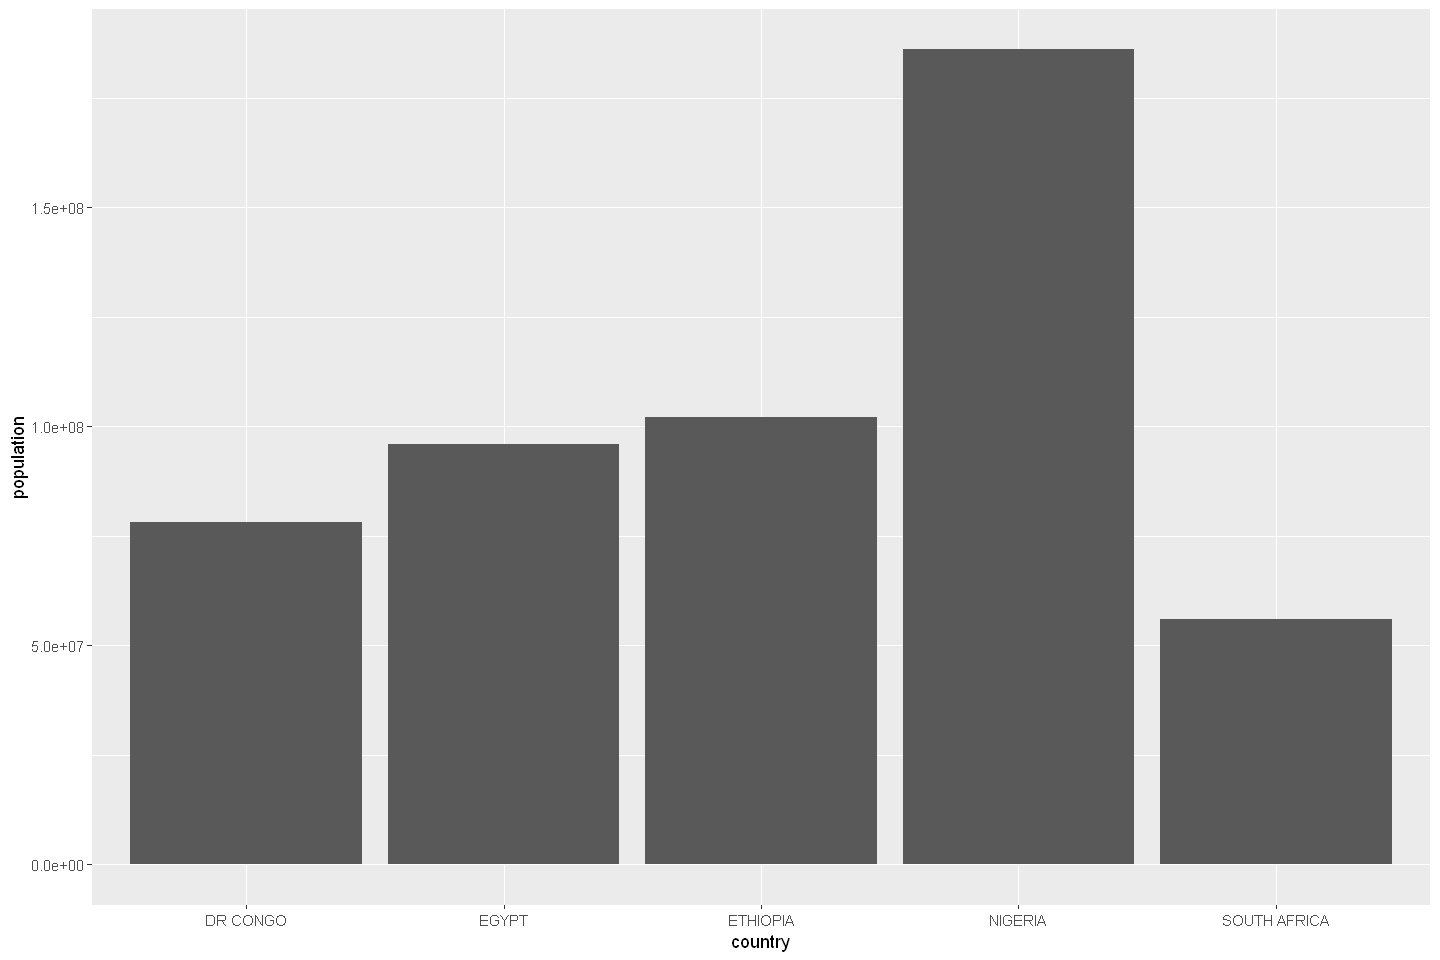

In [18]:
ggplot(data = popn) +
  geom_bar(mapping = aes(x = country, y = population), stat = "identity")
  ggtitle('Most populous countries in Africa')

#### Proportion

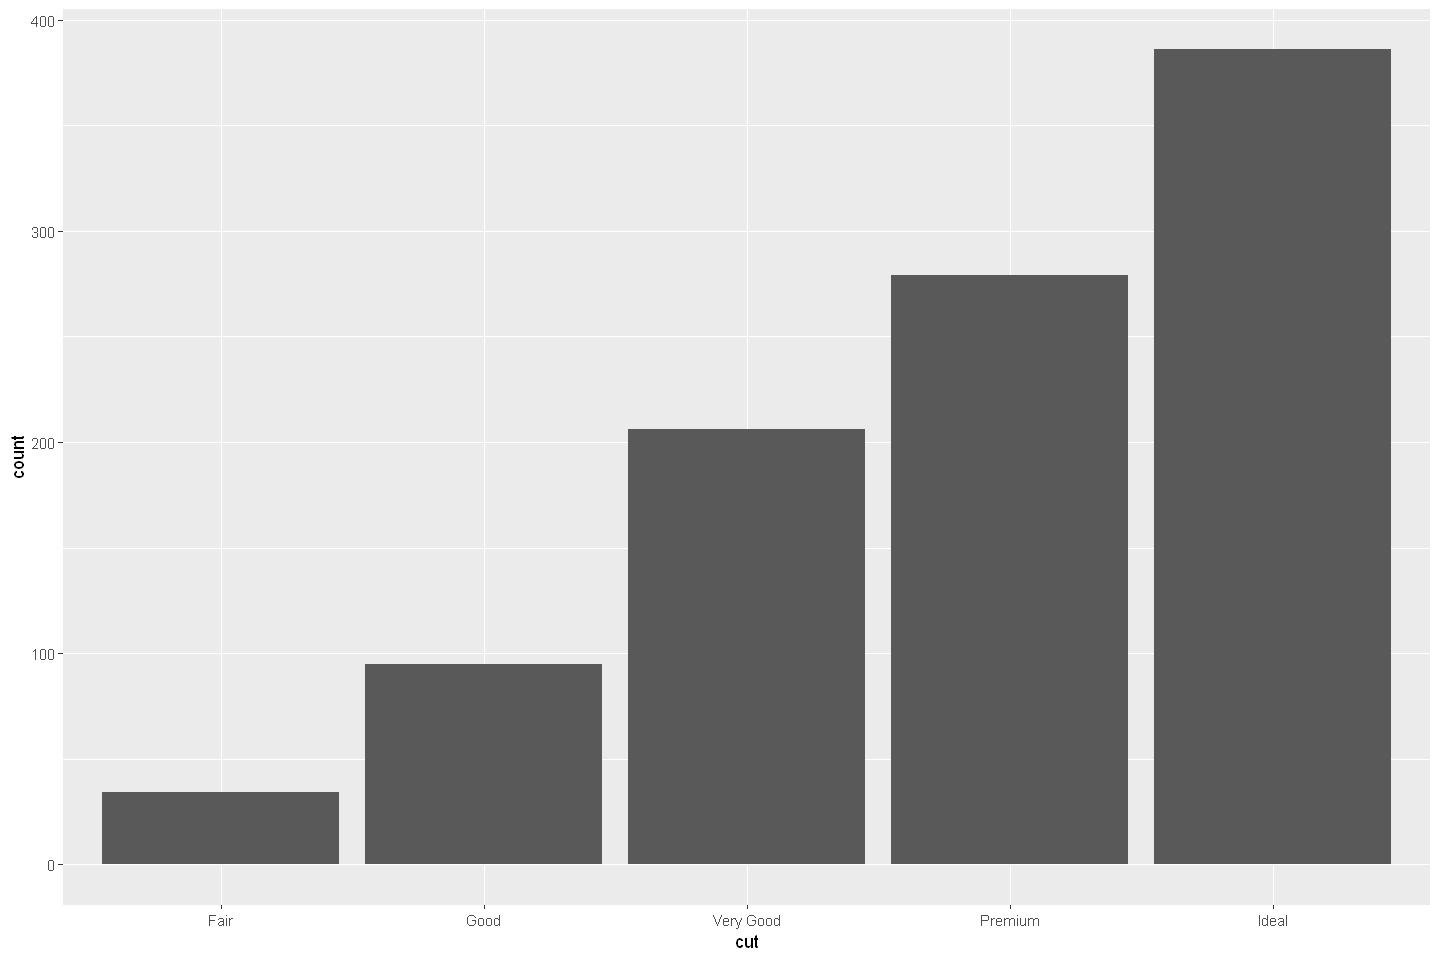

In [19]:
ggplot(data = dm1) +
    stat_count(mapping = aes(x = cut))

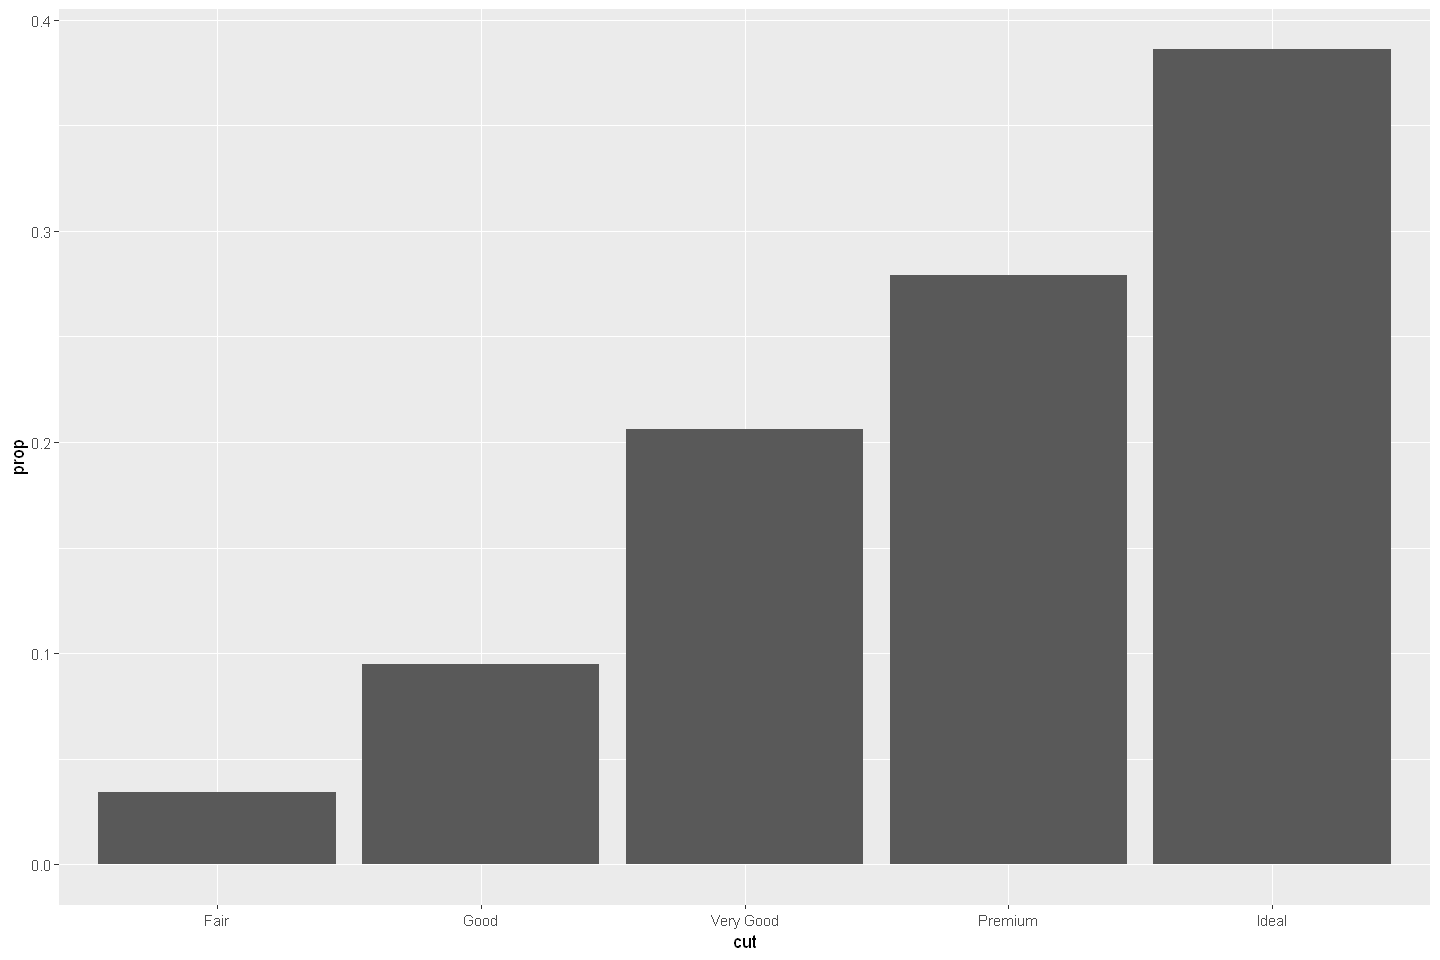

In [20]:
ggplot(data = dm1) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group="whatever"))

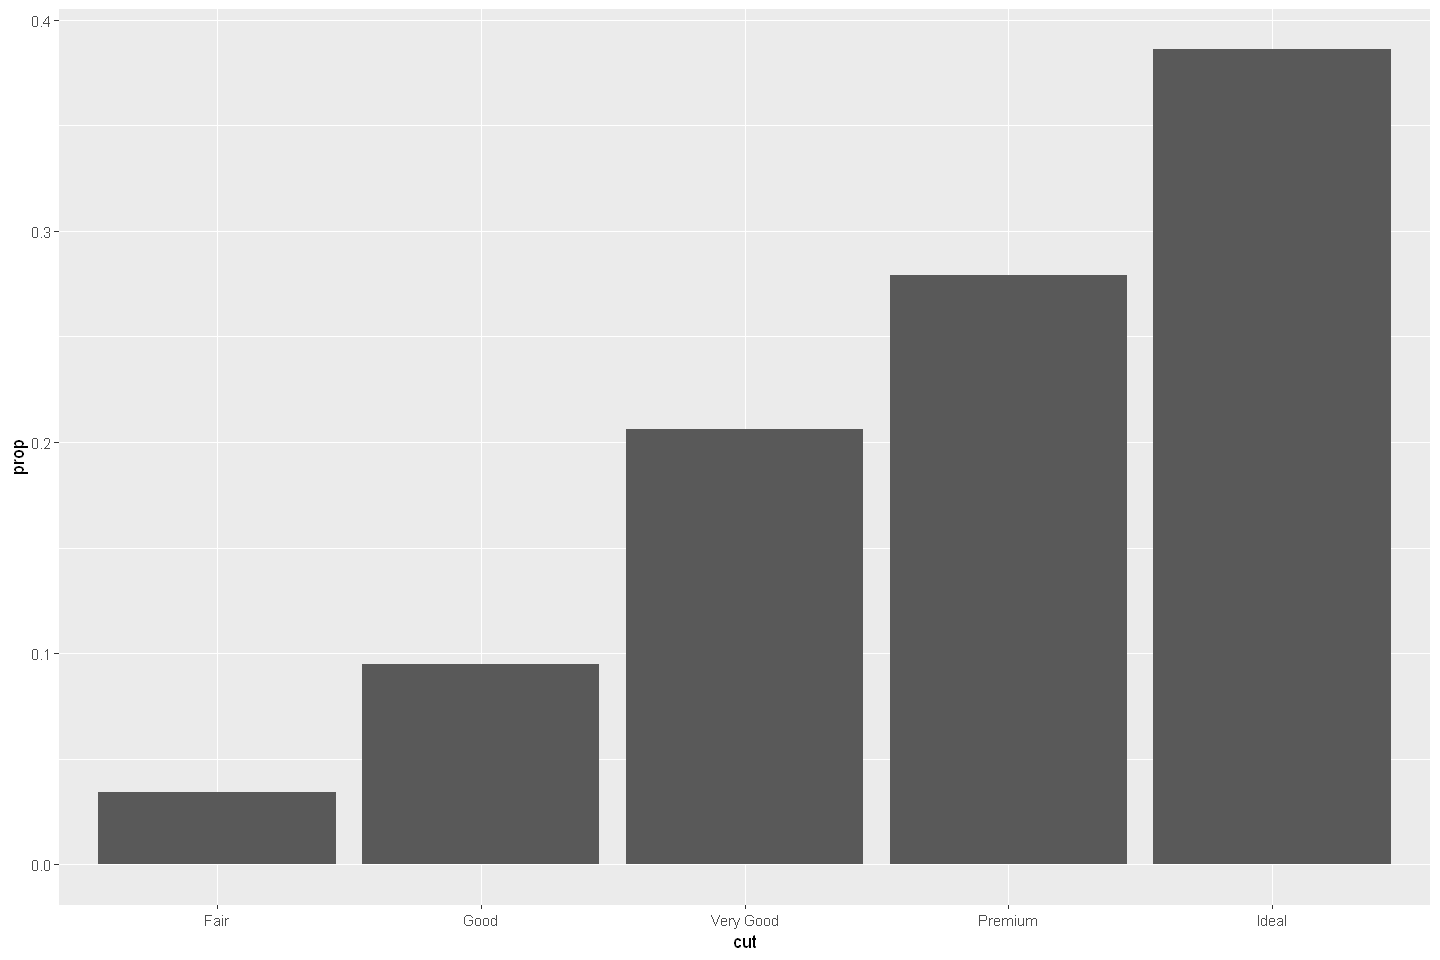

In [21]:
ggplot(data = dm1) + 
    geom_bar(mapping = aes(x=cut, y=stat(prop), group="whatever"))

#### geom_bar vs geom_col

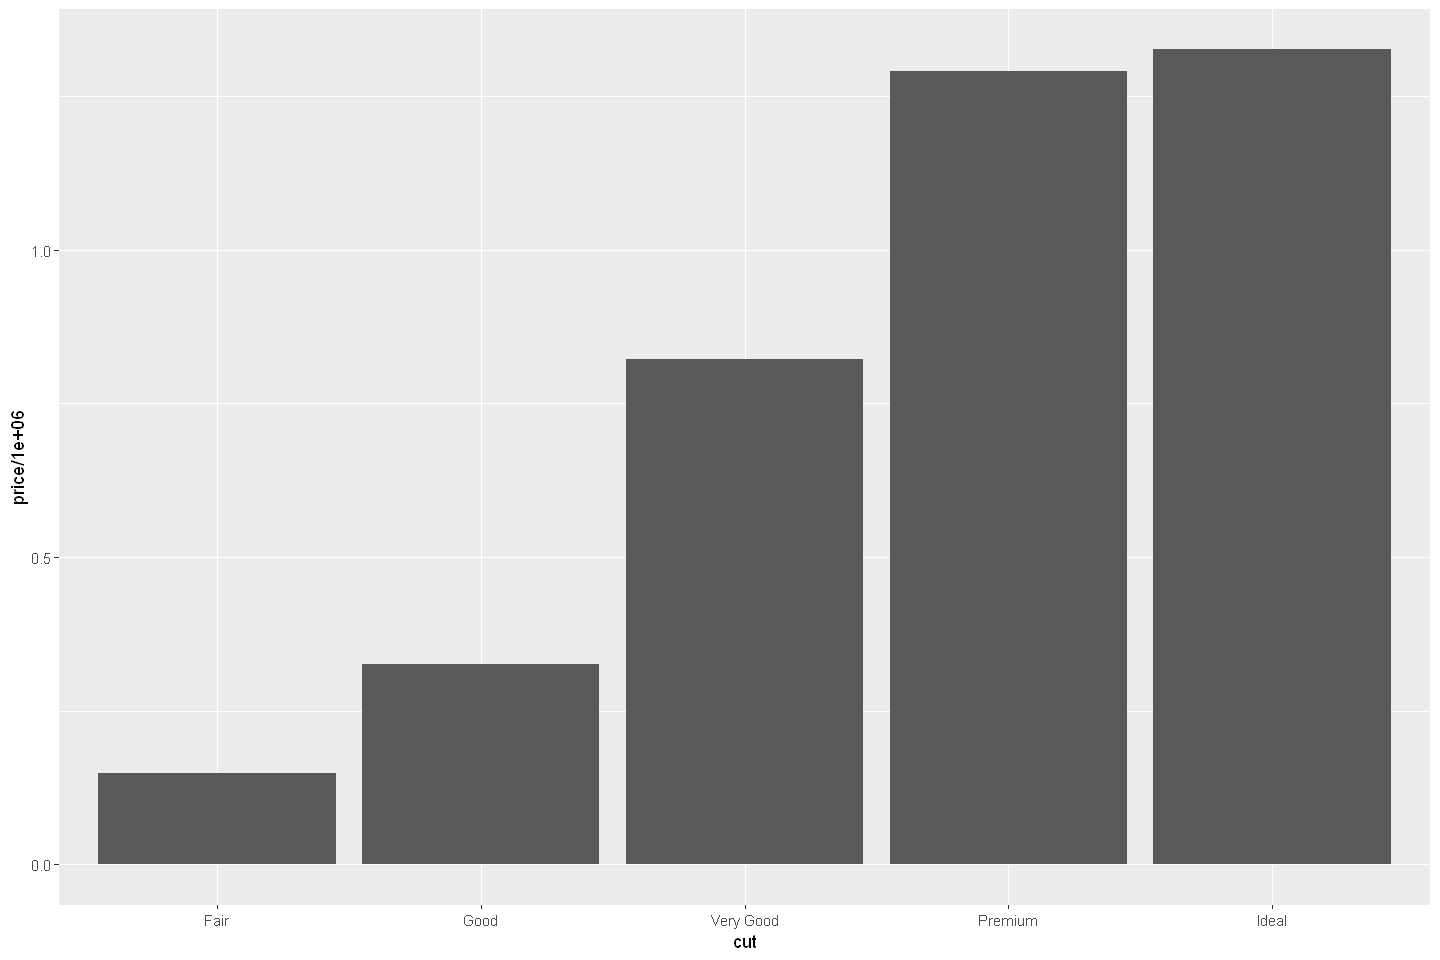

In [22]:
ggplot(data = dm1) +
    geom_bar(mapping = aes(x = cut, y = price / 1e6), stat = "identity")

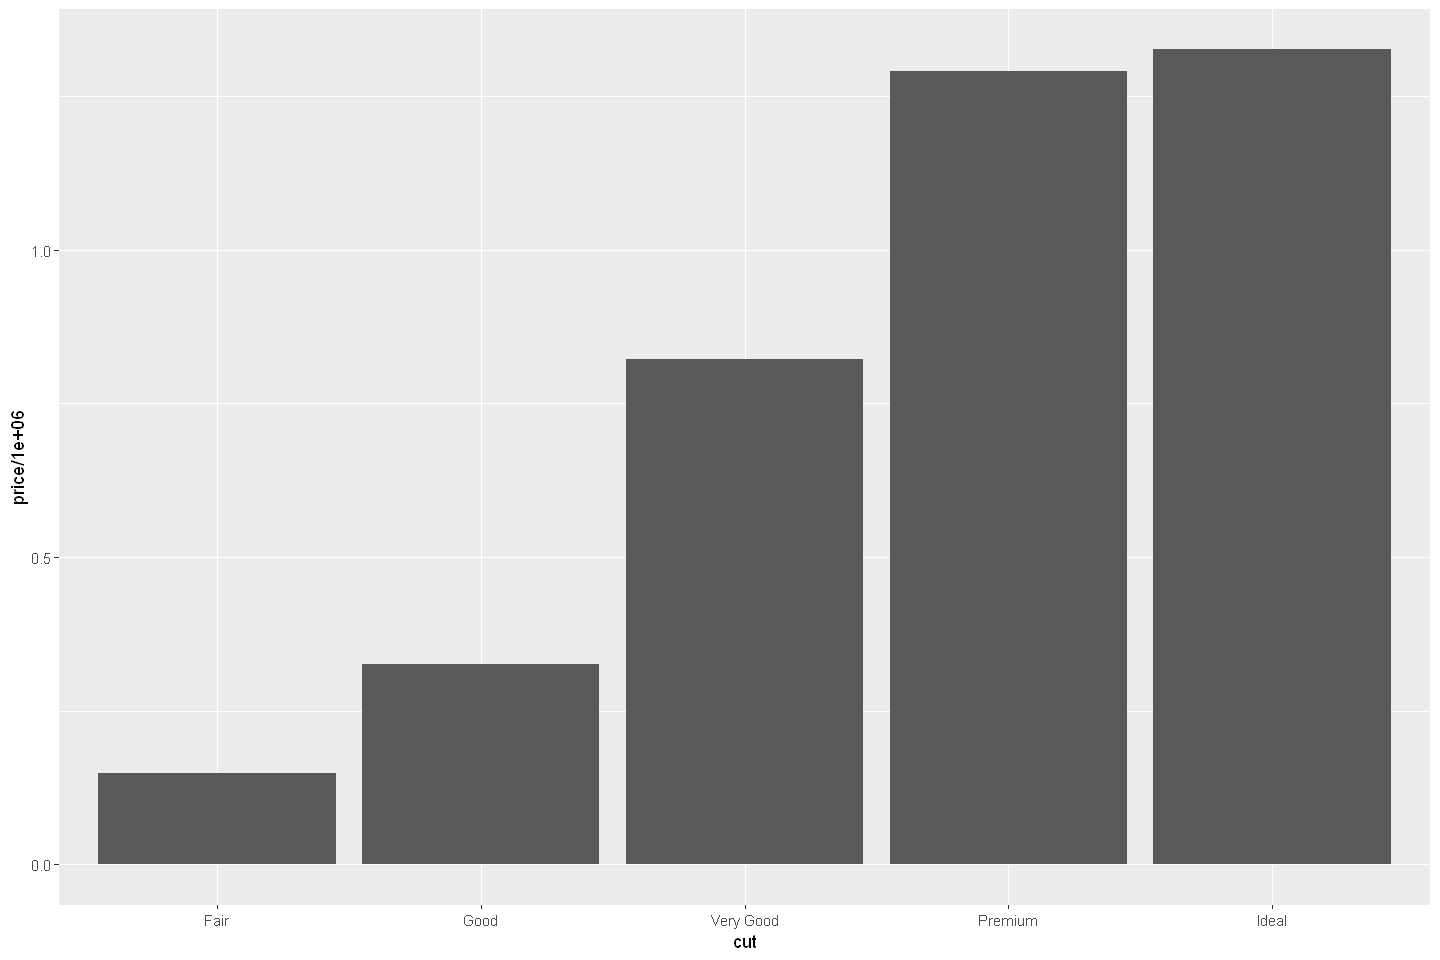

In [23]:
ggplot(data = dm1) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

### Exercise
1. What does geom_col() do? How is it different to geom_bar()?

2. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?

3. What variables does stat_smooth() compute? What parameters control its behaviour?

4. In our proportion bar chart, we need to set group = "whatever". Why? In other words, what is the problem with the graphs below?

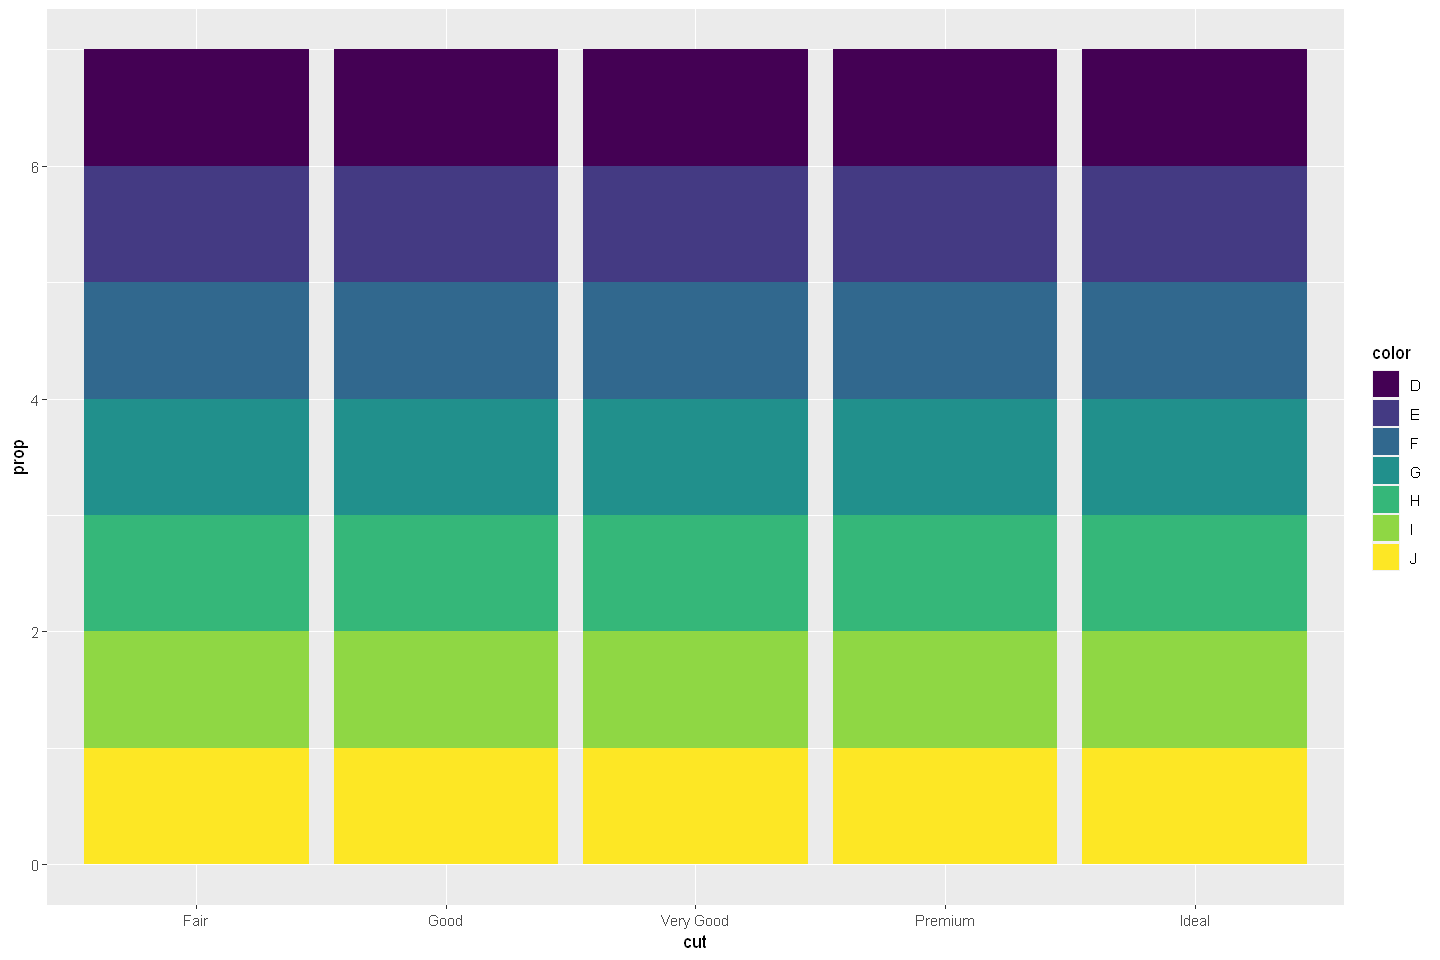

In [24]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop..))

## Position adjustments

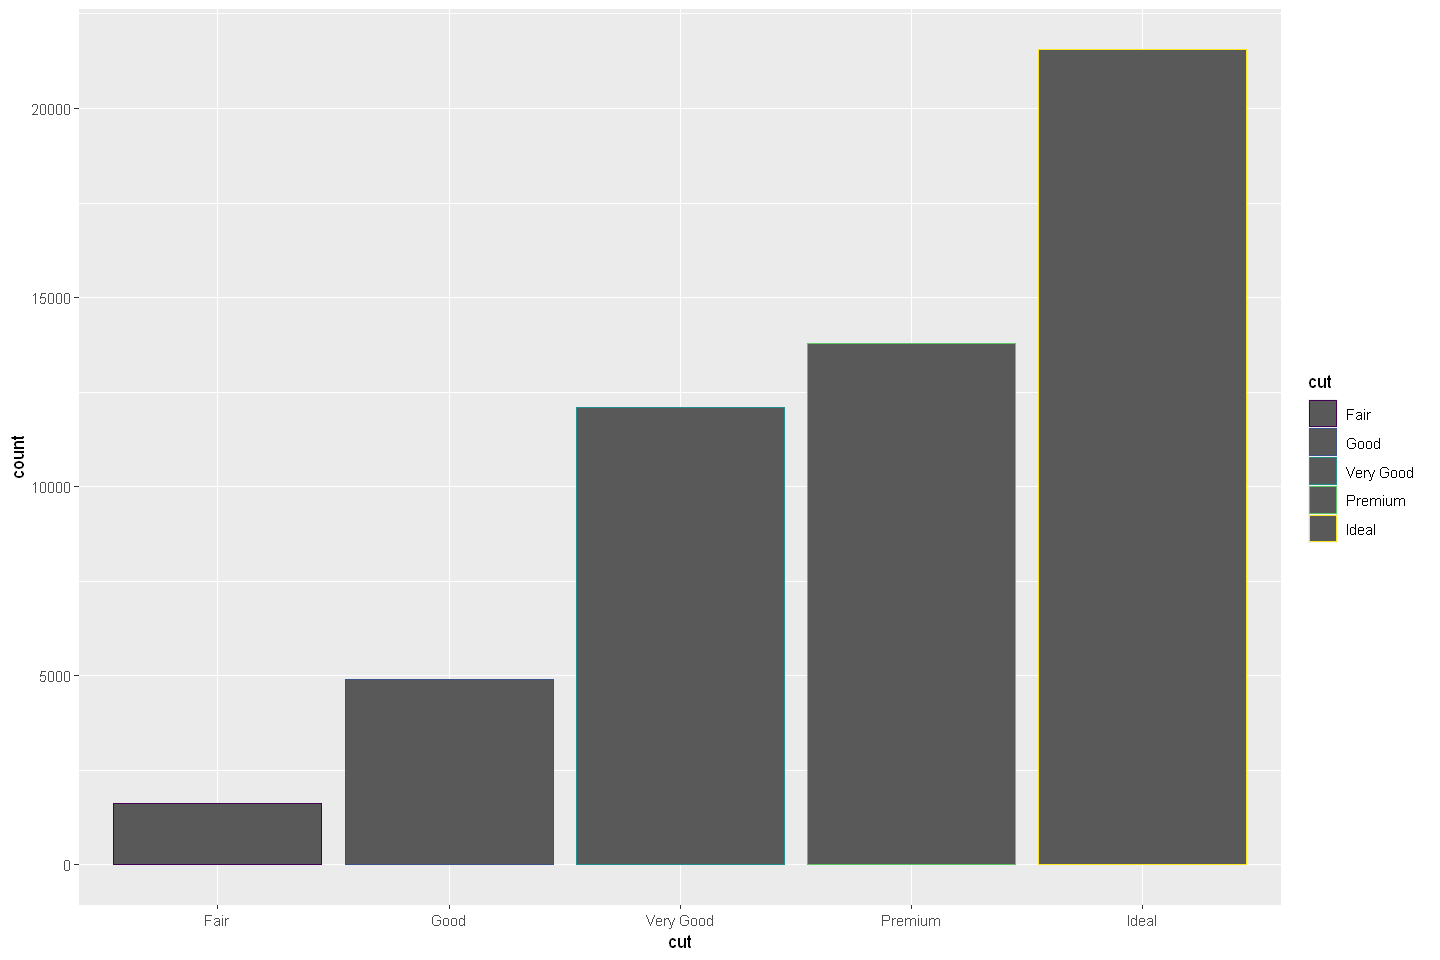

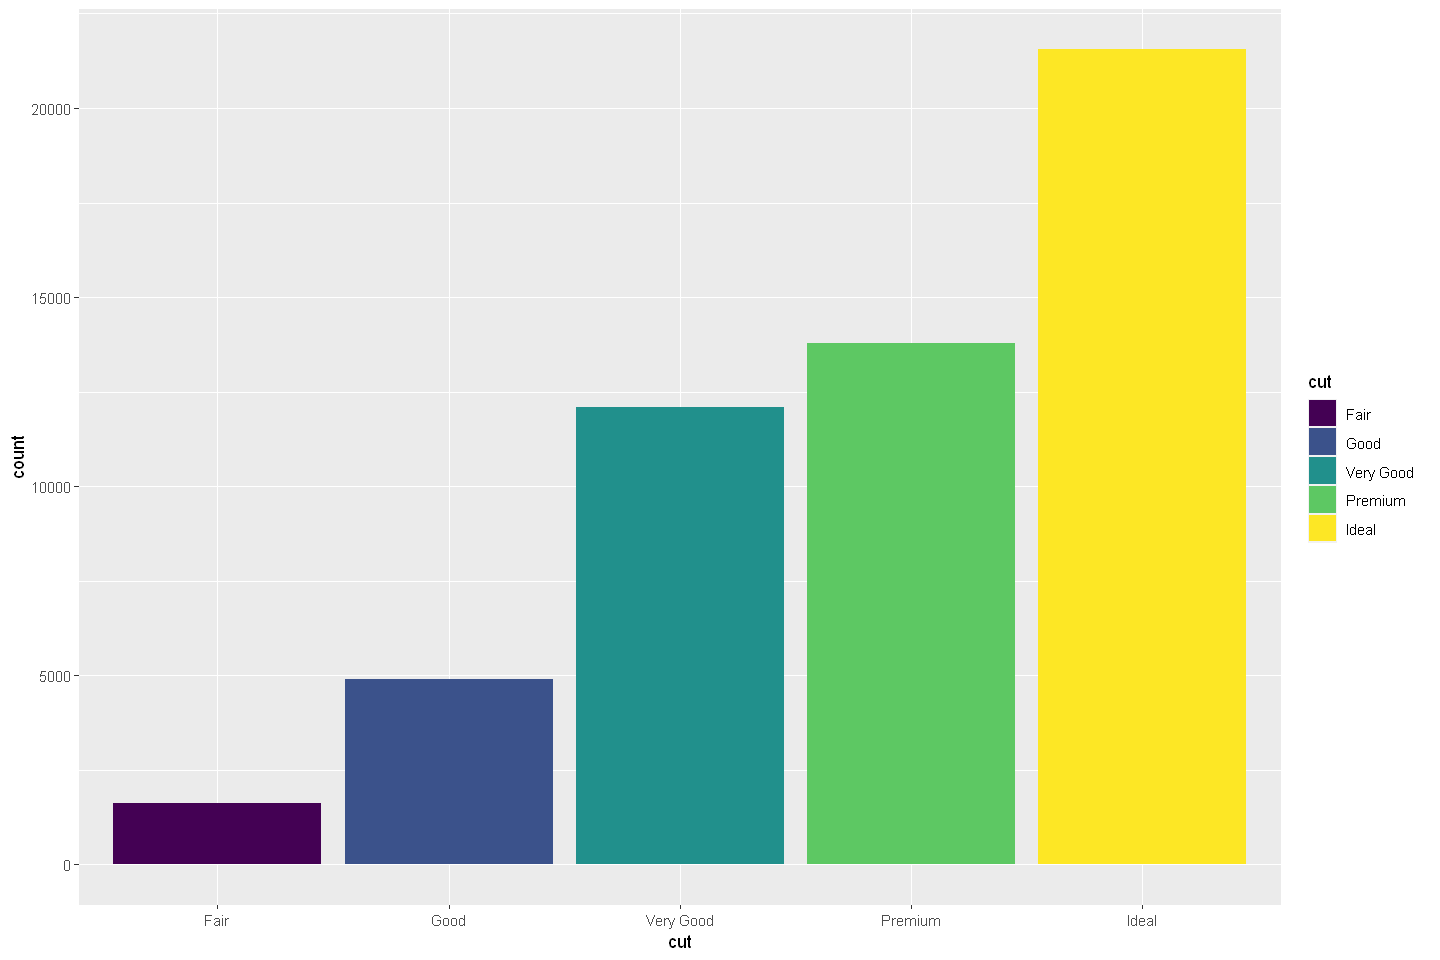

In [25]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar.

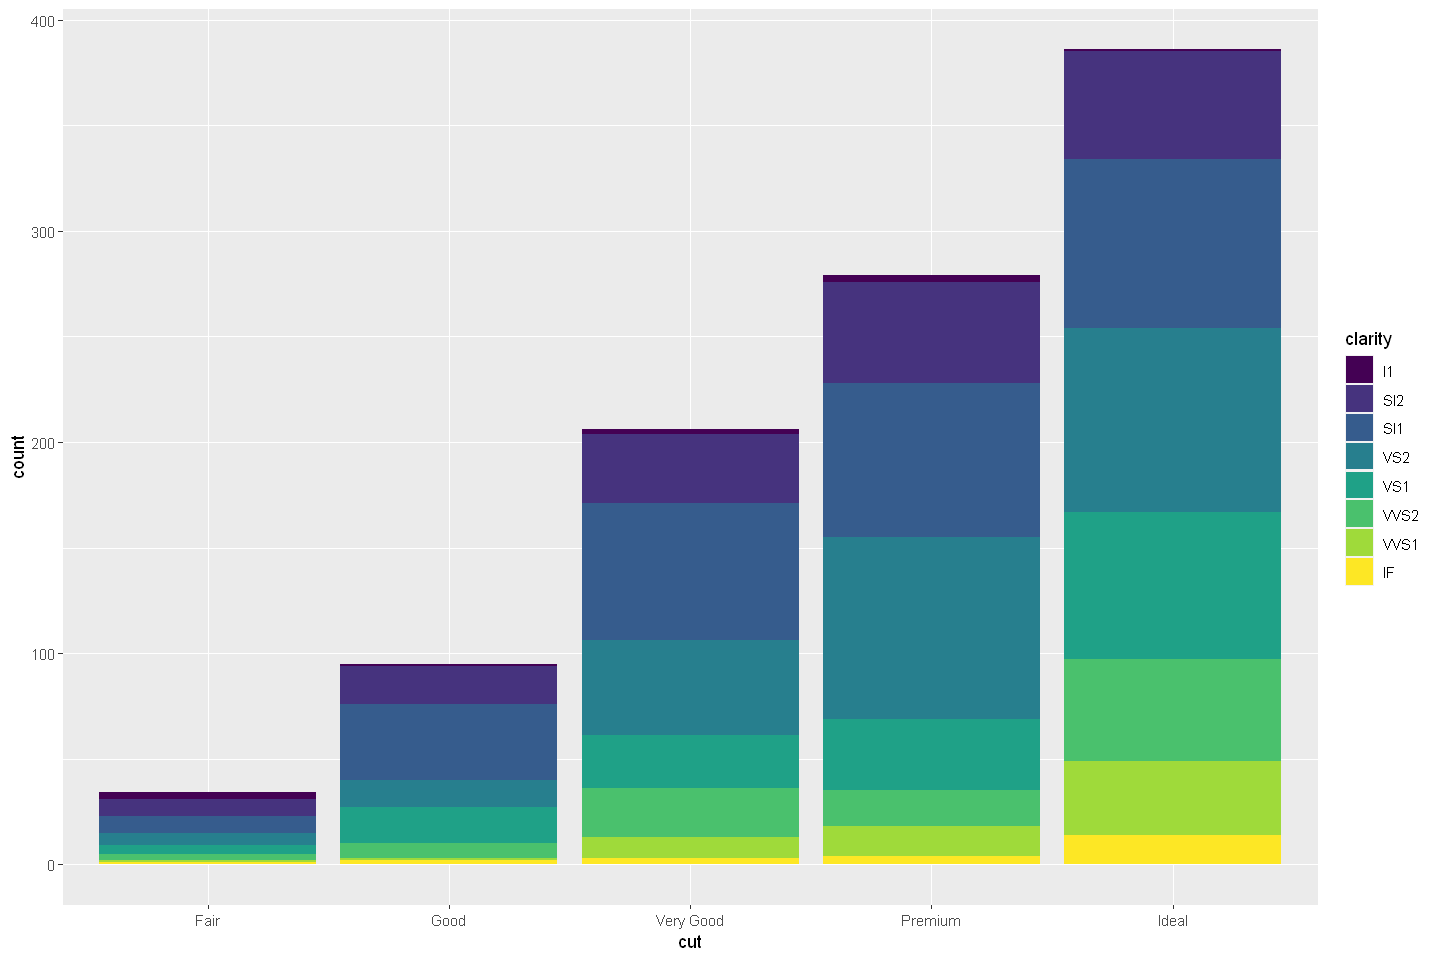

In [26]:
ggplot(data = dm1) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "stack") # this "fill" is different from the following one.

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

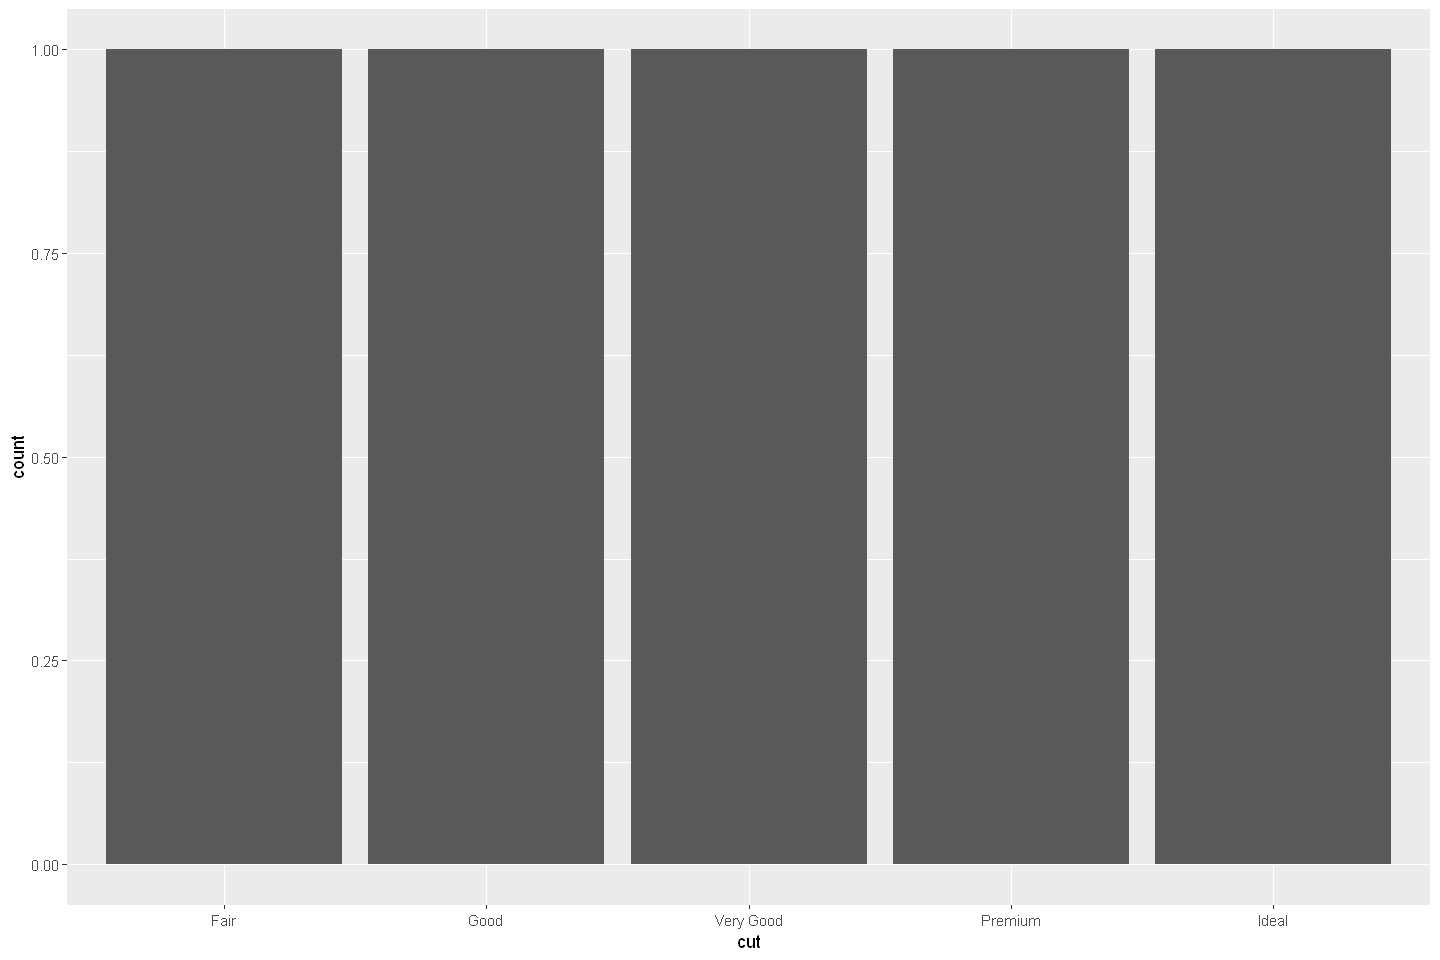

In [27]:
ggplot(data = dm1) + 
  geom_bar(mapping = aes(x = cut, fill = ), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

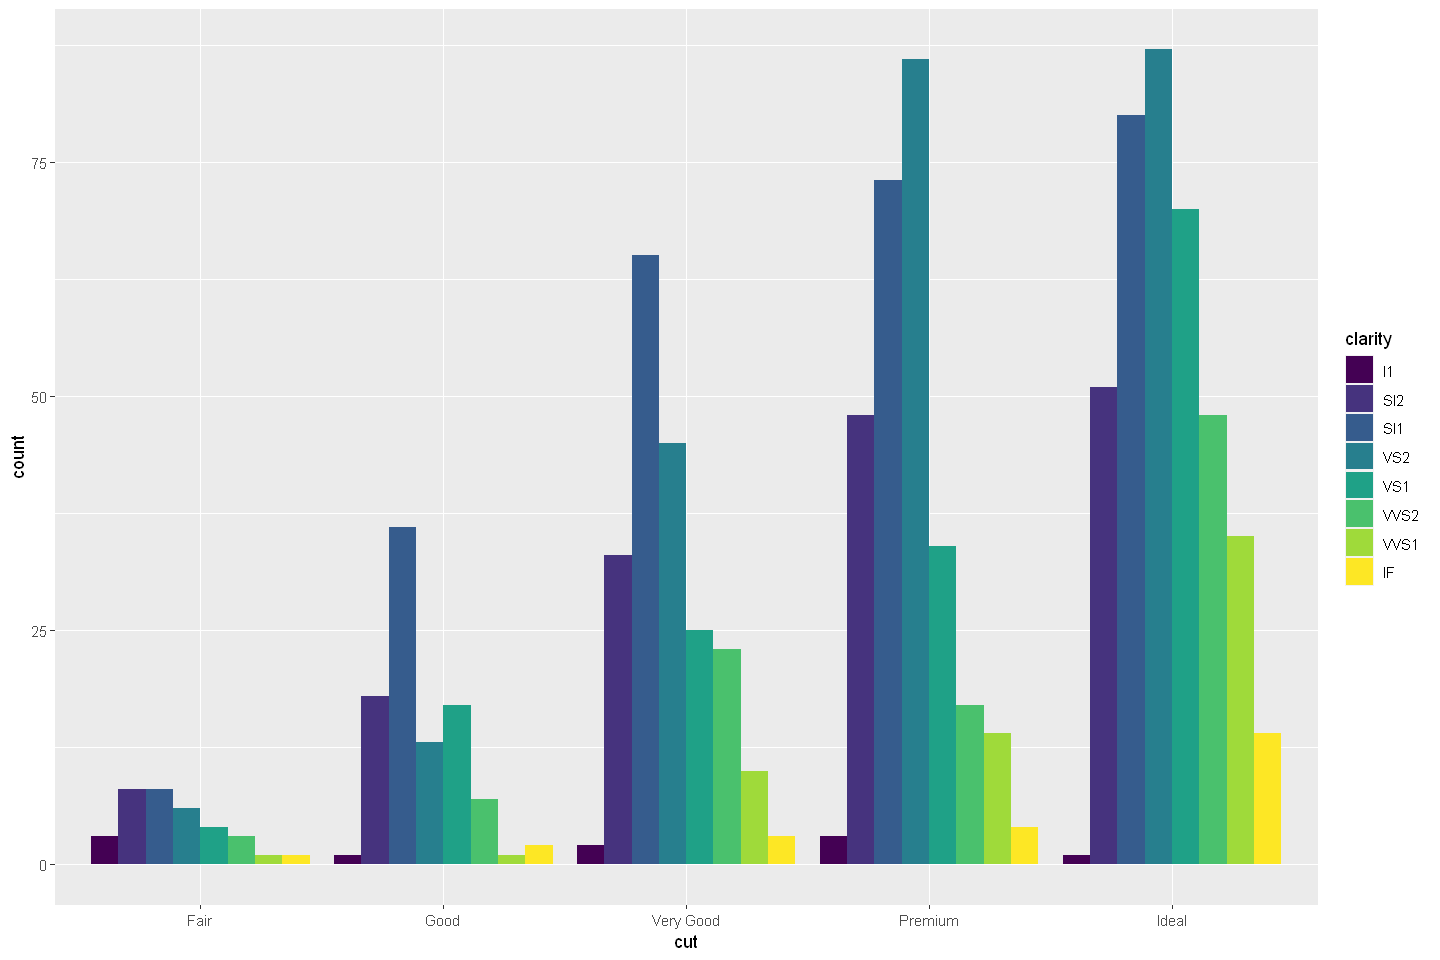

In [28]:
ggplot(data = dm1) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

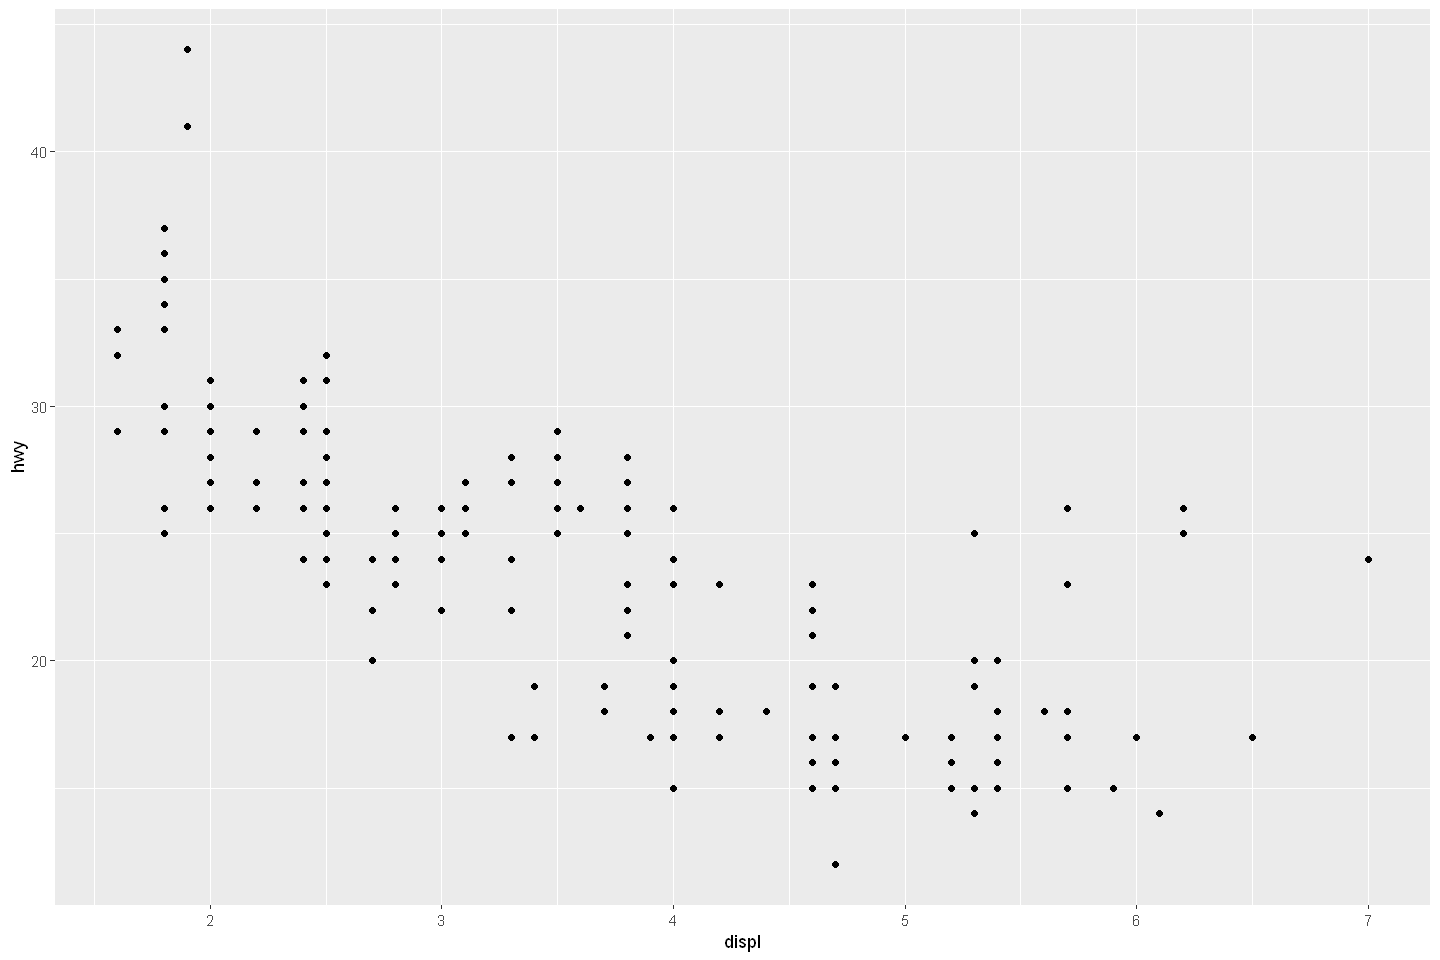

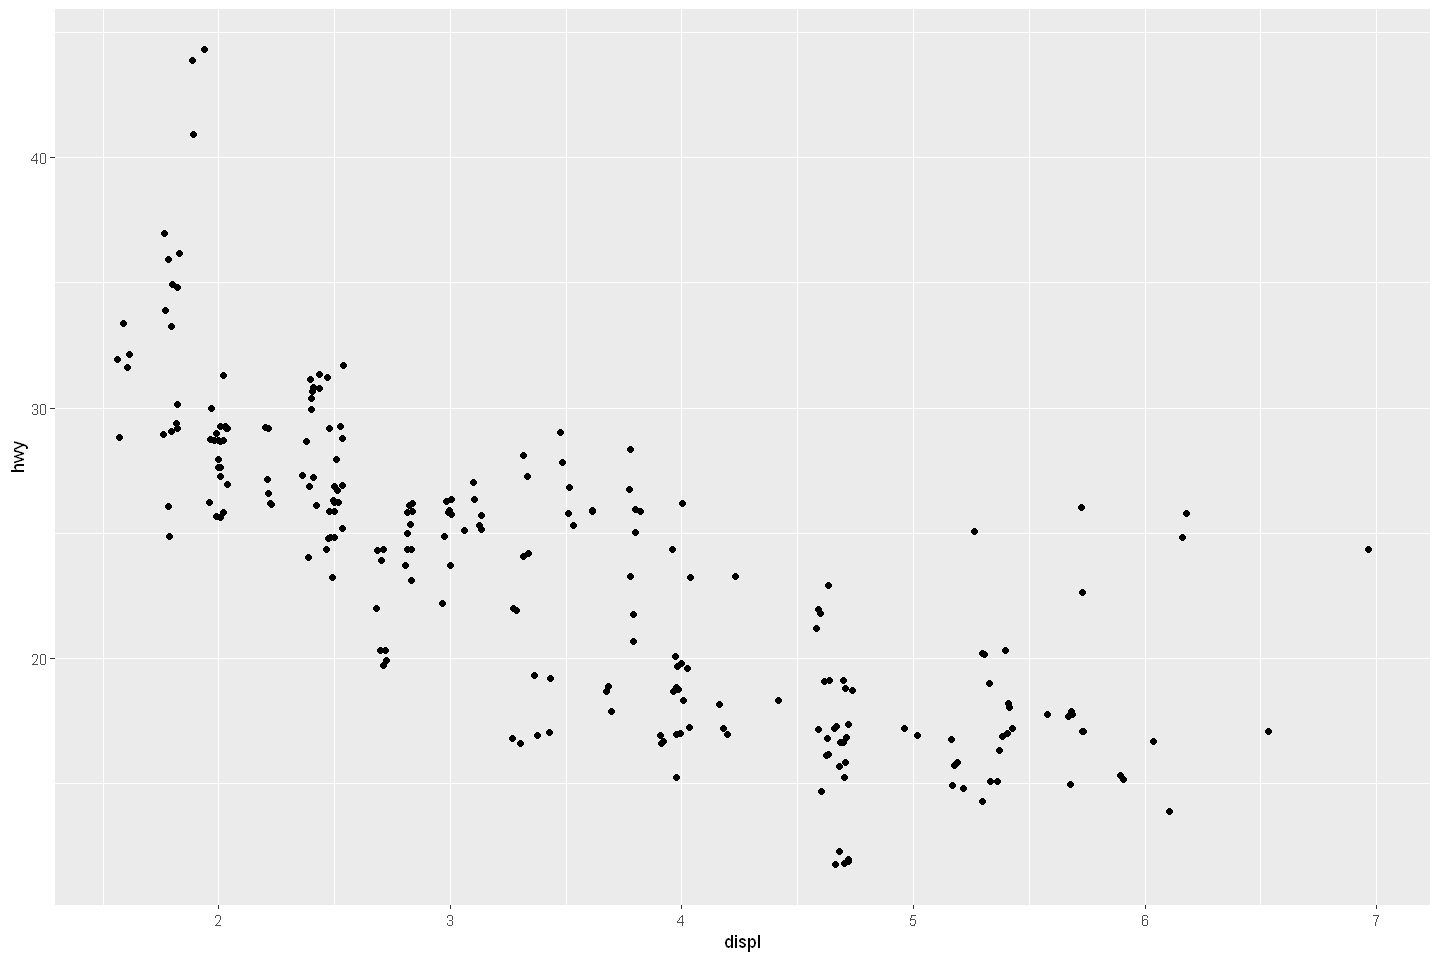

In [29]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")



# dplyr for data manipulation

#### 1) factors and ordered factors

In [30]:
dim(dm1)
head(dm1)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.31,Premium,G,VS2,60.3,58,9296,7.13,7.10,4.29
1.01,Good,H,SI1,64.0,58,4116,6.31,6.37,4.06
1.56,Very Good,I,SI1,62.9,58,7584,7.31,7.35,4.61
0.51,Very Good,E,SI1,60.8,57,1363,5.12,5.17,3.13
1.02,Premium,D,SI2,62.5,59,4818,6.38,6.43,4.00
2.00,Ideal,H,VS2,62.4,55,15451,8.03,7.94,4.99


In [31]:
str(dm1)

tibble [1,000 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:1000] 1.31 1.01 1.56 0.51 1.02 2 0.7 0.7 0.53 0.26 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 4 2 3 3 4 5 4 5 3 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 4 5 6 2 1 5 1 1 1 2 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 4 3 3 3 2 4 3 5 3 7 ...
 $ depth  : num [1:1000] 60.3 64 62.9 60.8 62.5 62.4 59.8 61.4 60 61.8 ...
 $ table  : num [1:1000] 58 58 58 57 59 55 57 54.2 59.8 59 ...
 $ price  : int [1:1000] 9296 4116 7584 1363 4818 15451 2589 3752 1724 539 ...
 $ x      : num [1:1000] 7.13 6.31 7.31 5.12 6.38 8.03 5.79 5.72 5.25 4.11 ...
 $ y      : num [1:1000] 7.1 6.37 7.35 5.17 6.43 7.94 5.74 5.76 5.26 4.14 ...
 $ z      : num [1:1000] 4.29 4.06 4.61 3.13 4 4.99 3.45 3.52 3.15 2.55 ...


Simply run 'dm1' after declaring the dm1 variable above. can you guess what 'dbl', 'ord', and 'int' are? 

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

read more at: https://tibble.tidyverse.org/articles/types.html

In [32]:
print(levels(dm1$cut))
print(levels(dm1$color))
print(levels(dm1$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [33]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
sizes

[1] "M"   "S"   "S"   "M"   "XL"  "XXL" "XL"  "S"   "M"   "L"

In [34]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
class(sizes)

[1] "ordered" "factor"

In [35]:
levels(sizes) # in R Studio, this will output the ordering explicitly with less-than signs
sort(sizes, decreasing = TRUE)
sort(sizes, decreasing = FALSE)

[1] "S"   "M"   "L"   "XL"  "XXL"

[1] XXL XL  XL  L   M   M   M   S   S   S  
Levels: S < M < L < XL < XXL

[1] S   S   S   M   M   M   L   XL  XL  XXL
Levels: S < M < L < XL < XXL

#### 2) functions in dplyr

There are five functions in dplyr: filter, arrange, select, mutate and summarise. 
All of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Filter
Filtering is interpereted to mean "keep only the rows which match these criteria". The syntax for the `filter` command is 
```{r}
filter(<TIBBLE>, <LOGICAL CRITERIA>)
```
This commands returns a new tibble whose rows all match the specified criteria.

In [36]:
filter(dm1, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.2,Fair,J,SI1,65.2,58,4838,6.67,6.58,4.32


Usually you want to store the newly subsetted data in memory. 

In [37]:
worst_diamonds = filter(dm1, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [38]:
4 == 6
test = 6
test
test == 5

[1] FALSE

[1] 6

[1] FALSE

## Use cases

In [39]:
a = filter(dm1, color == 'D' | color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm1, color == 'D' & color == 'J') 
# filtering for rows that satisfy both conditions

best_cuts = filter(dm1, cut == 'Ideal') 
# filtering using membership condition

not_worst_cuts = filter(dm1, cut > 'Fair') 
# can do this because cut is an ordinal variable

In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [40]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [41]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [42]:
filter(df, x == NA)

x
<dbl>


In [43]:
filter(df, x>1)

x
<dbl>
3


In [44]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3


### Exercise
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that will allow you to output diamonds with even-numbered prices

## Arrange
`arrange` can order rows of a data frame using a variable name (or a more complicated expression). If you provide multiple expressions to order by, it uses the second one to break ties in the first one, third one to break ties in the second one, and so on.

In [47]:
arrange(dm1, cut, color)[1:10,] 
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.90,Fair,D,SI2,64.7,59,3205,6.09,5.99,3.91
0.90,Fair,D,SI1,64.0,63,4796,6.12,6.04,3.89
0.50,Fair,D,VS2,63.7,57,1431,5.05,4.90,3.17
0.50,Fair,D,VS2,63.7,57,1431,5.05,4.90,3.17
0.75,Fair,E,VS2,56.0,67,2940,6.18,6.08,3.43
0.56,Fair,E,VVS2,57.3,60,2426,5.50,5.57,3.17
1.01,Fair,E,SI1,65.3,59,4844,6.13,6.19,4.02
0.90,Fair,E,SI1,65.5,59,3508,6.06,6.03,3.96
0.90,Fair,E,SI1,64.9,56,3743,6.12,6.18,3.99


In [48]:
# arranging in the descending order of carat and then cut
arrange(dm1, desc(carat), cut)[1:10,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.65,Fair,H,I1,67.1,53,11668,9.53,9.48,6.38
2.54,Very Good,H,SI2,63.5,56,16353,8.68,8.65,5.50
2.51,Ideal,H,SI2,62.0,57,17162,8.72,8.67,5.39
2.50,Ideal,J,SI2,63.8,53,15246,8.56,8.50,5.45
2.32,Premium,J,SI2,62.5,58,14666,8.47,8.43,5.28
2.19,Very Good,I,SI2,60.3,60,15907,8.29,8.33,5.01
2.17,Ideal,H,SI2,62.0,56,17805,8.25,8.29,5.13
2.14,Fair,F,SI2,64.8,60,13825,8.11,8.00,5.22
2.14,Premium,F,SI2,58.2,61,17742,8.50,8.45,4.93


Missing values are always sorted at the end:

In [49]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
<dbl>
2
5
NA


In [50]:
arrange(df, desc(x))

x
<dbl>
5
2
NA


### Exercise
1. Use arrange to sort the dm1 dataset by describing order of the product of the x, y, and z variables. Output the first 10 rows of the new dataset.

## Select
`select` is used to keep only a few variables of interest to the current analysis. It is most useful when working with data frames involving a large number of variables.

In [51]:
names(dm1)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [52]:
select(dm1, carat, price)[1:10,]

carat,price
<dbl>,<int>
1.31,9296
1.01,4116
1.56,7584
0.51,1363
1.02,4818
2.00,15451
0.70,2589
0.70,3752
0.53,1724


In [53]:
select(dm1, carat:price)[1:10,]

carat,cut,color,clarity,depth,table,price
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>
1.31,Premium,G,VS2,60.3,58.0,9296
1.01,Good,H,SI1,64.0,58.0,4116
1.56,Very Good,I,SI1,62.9,58.0,7584
0.51,Very Good,E,SI1,60.8,57.0,1363
1.02,Premium,D,SI2,62.5,59.0,4818
2.00,Ideal,H,VS2,62.4,55.0,15451
0.70,Premium,D,SI1,59.8,57.0,2589
0.70,Ideal,D,VS1,61.4,54.2,3752
0.53,Very Good,D,SI1,60.0,59.8,1724


In [54]:
select(dm1, -(carat:price))[1:10,]

x,y,z
<dbl>,<dbl>,<dbl>
7.13,7.10,4.29
6.31,6.37,4.06
7.31,7.35,4.61
5.12,5.17,3.13
6.38,6.43,4.00
8.03,7.94,4.99
5.79,5.74,3.45
5.72,5.76,3.52
5.25,5.26,3.15


Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [55]:
rename(dm1, width=x)[1:10,]

carat,cut,color,clarity,depth,table,price,width,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.31,Premium,G,VS2,60.3,58.0,9296,7.13,7.10,4.29
1.01,Good,H,SI1,64.0,58.0,4116,6.31,6.37,4.06
1.56,Very Good,I,SI1,62.9,58.0,7584,7.31,7.35,4.61
0.51,Very Good,E,SI1,60.8,57.0,1363,5.12,5.17,3.13
1.02,Premium,D,SI2,62.5,59.0,4818,6.38,6.43,4.00
2.00,Ideal,H,VS2,62.4,55.0,15451,8.03,7.94,4.99
0.70,Premium,D,SI1,59.8,57.0,2589,5.79,5.74,3.45
0.70,Ideal,D,VS1,61.4,54.2,3752,5.72,5.76,3.52
0.53,Very Good,D,SI1,60.0,59.8,1724,5.25,5.26,3.15


In [56]:
select(dm1, width = x)[1:10,]

width
<dbl>
7.13
6.31
7.31
5.12
6.38
8.03
5.79
5.72
5.25


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dataframe

In [57]:
select(dm1, price, carat, everything())[1:10,]

price,carat,cut,color,clarity,depth,table,x,y,z
<int>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9296,1.31,Premium,G,VS2,60.3,58.0,7.13,7.10,4.29
4116,1.01,Good,H,SI1,64.0,58.0,6.31,6.37,4.06
7584,1.56,Very Good,I,SI1,62.9,58.0,7.31,7.35,4.61
1363,0.51,Very Good,E,SI1,60.8,57.0,5.12,5.17,3.13
4818,1.02,Premium,D,SI2,62.5,59.0,6.38,6.43,4.00
15451,2.00,Ideal,H,VS2,62.4,55.0,8.03,7.94,4.99
2589,0.70,Premium,D,SI1,59.8,57.0,5.79,5.74,3.45
3752,0.70,Ideal,D,VS1,61.4,54.2,5.72,5.76,3.52
1724,0.53,Very Good,D,SI1,60.0,59.8,5.25,5.26,3.15


There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise:
1. Write code that will have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 10 rows of such a datset.

### Mutate
The `dplyr`/`tidyverse` package offers the `mutate()` and `transmute()` commands to add new variables to data tibbles. The syntax is:
```{r}
mutate(<tibble>, <new variable> = <formula for new variable>,
                    <other new variable> = <other formula>)
```
This returns a copy of `<tibble>` with the new variables added on.

`transmute()` does the same thing as `mutate()` but only keeps the new variables.

In [59]:
dm_dimensions = select(dm1, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = x*y*z
)[1:10,]

x,y,z,volume
<dbl>,<dbl>,<dbl>,<dbl>
7.13,7.10,4.29,217.17267
6.31,6.37,4.06,163.19048
7.31,7.35,4.61,247.68839
5.12,5.17,3.13,82.85235
6.38,6.43,4.00,164.09360
8.03,7.94,4.99,318.15342
5.79,5.74,3.45,114.65937
5.72,5.76,3.52,115.97414
5.25,5.26,3.15,86.98725


If you only want to keep the new variables, use transmute()

In [60]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:10,]

volume
<dbl>
217.17267
163.19048
247.68839
82.85235
164.09360
318.15342
114.65937
115.97414
86.98725



## Summarise
`summarize()` can be used to summarize entire data frames by collapsing them into single number summaries. The syntax is:
```{r}
summarize(<grouped tibble>, 
<new variable> = 
<formula for new variable>,
<other new variable> = <other formula>)
```
`summarize()` is most useful when combined with `group_by()` to group observations before calculating the summary statistic.

In [61]:
by_color = group_by(dm1, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

color,avg_price
<ord>,<dbl>
D,3003.944
E,3244.696
F,3825.508
G,3801.472
H,4640.611
I,4811.294
J,5182.837


#### Case study to apply the dplyr functions

Information of the mpg data set: https://ggplot2.tidyverse.org/reference/mpg.html

In [62]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [63]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans))) # grepl() returns TRUE when a pattern is found in the corresponding character string.
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
<chr>,<chr>,<dbl>,<fct>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [64]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
head(hwy_summary)

`summarise()` has grouped output by 'manufacturer'. You can override using the `.groups` argument.



manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238


In [65]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


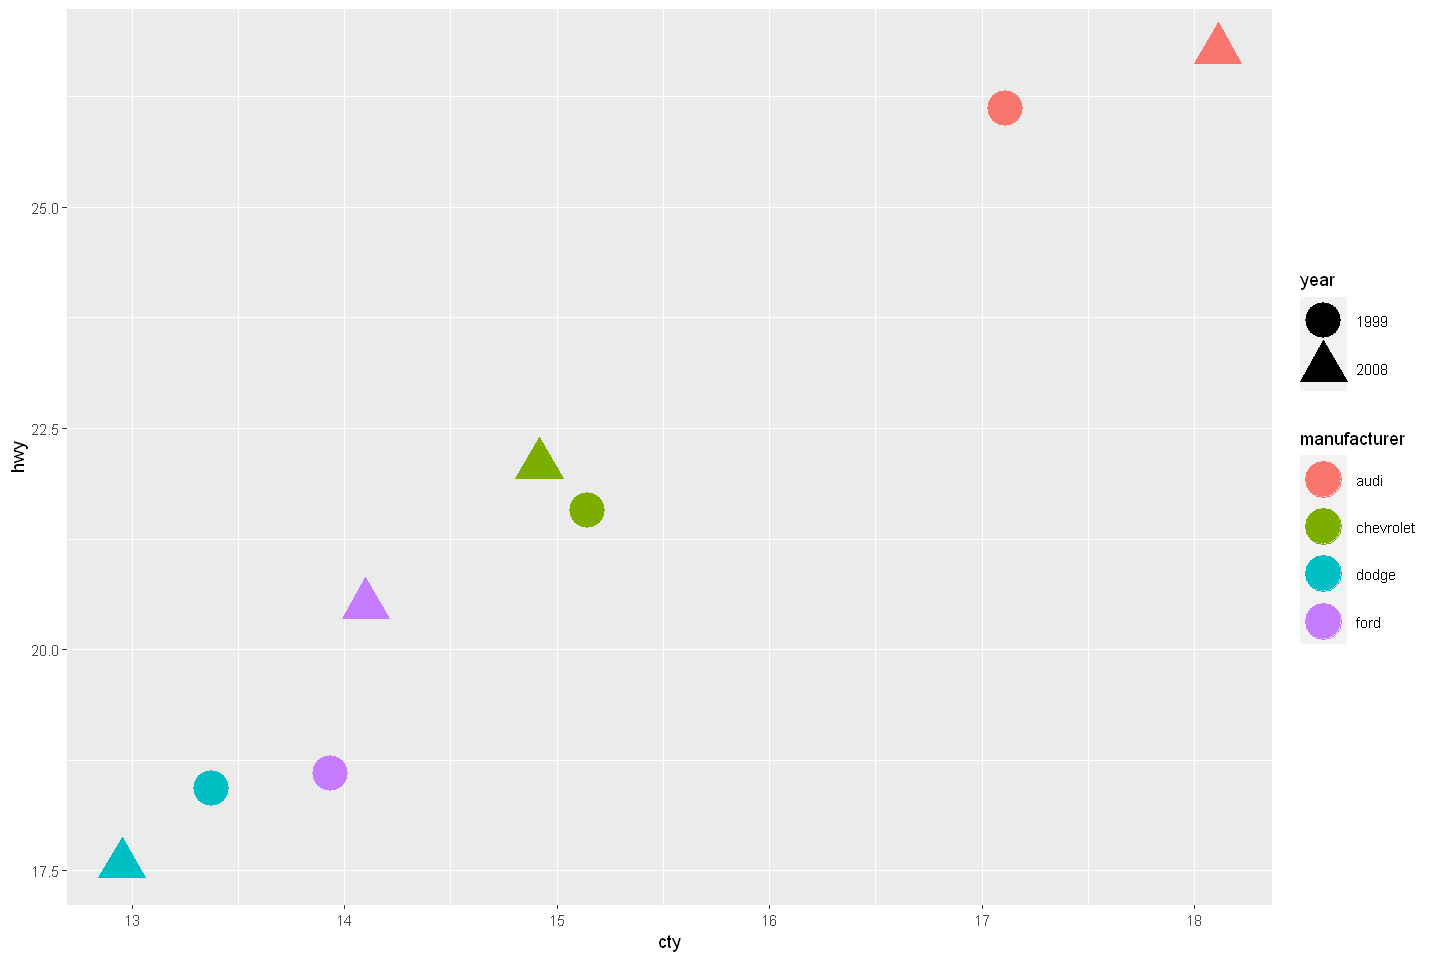

In [66]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
    geom_point(mapping = aes(color = manufacturer, shape = year), size = 10)

## Pipes
The transformations above can be written as:


In [68]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

`summarise()` has grouped output by 'manufacturer'. You can override using the `.groups` argument.



manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


In [69]:
hwy_summary_ag2 = mpg2 %>% 
    group_by(manufacturer, year) %>%
    summarise(
        count = n(),
        hwy = mean(hwy, na.rm = TRUE),
        cty = mean(cty, na.rm = TRUE)) %>%
    filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag2

`summarise()` has grouped output by 'manufacturer'. You can override using the `.groups` argument.



manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
